# Insurance Claim Fraud Detection Project

NAME - ABHISHEK VERMA

Project Description ----- Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

Dataset Link- • https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [63]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [64]:
df.shape

(1000, 40)

In [65]:
print('No of rows and culumns:',df.shape)

No of rows and culumns: (1000, 40)


In [66]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [67]:
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

In [68]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [69]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [71]:
df.value_counts

<bound method DataFrame.value_counts of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  

# Check for Missing Values

In [72]:
df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [73]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [74]:
df.drop(['_c39'],axis=1,inplace=True)

In [75]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<Axes: >

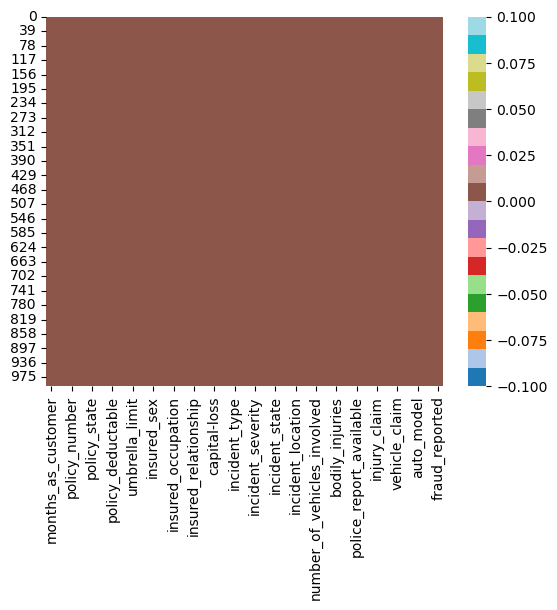

In [76]:
sns.heatmap(df.isnull(),cmap="tab20")

In [77]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [78]:
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [79]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [80]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [81]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [82]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

In [83]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

In [84]:
df.head(5)

months_as_customer  age  policy_number policy_state  policy_deductable  \
0                 328   48         521585           OH               1000   
1                 228   42         342868           IN               2000   
2                 134   29         687698           OH               2000   
3                 256   41         227811           IL               2000   
4                 228   44         367455           IL               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level  ... auto_model fraud_reported CSL_Personal  \
0                      MD  ...        92x              Y          250   
1                      MD  ...       E400              Y          250   
2                     PhD  ...        RAM              N          100   
3                     PhD  ...      Tahoe              Y          250   
4               Associate  ...        RSX              N          500   

   CSL_Accidental  policy_bind_day policy_bind_month policy_bind_year  \
0             500               17                10             2014   
1             500               27                 6             2006   
2             300                9                 6             2000   
3             500               25                 5             1990   
4            1000                6                 6             2014   

  incident_day incident_month Automobile_Age  
0           25              1             11  
1           21              1              8  
2           22              2              8  
3            1             10              1  
4           17              2              6  

[5 rows x 43 columns]

# Separating Categorical and Numerical columns

In [85]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Print the lists of categorical and numerical columns
print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal',
       'CSL_Accidental'],
      dtype='object')

Numerical Columns:
Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_bind_day', 'policy_bind_month', 'policy_bind_year',
       'incident_day', 'incident_month', 'Automobile_Age'],
      dtype='objec

In [86]:
print(f'Number of Categorical features: {len(categorical_cols)}')
print(f'Number of Numerical features: {len(numerical_cols)}')

Number of Categorical features: 20
Number of Numerical features: 23


# Statistical Analysis

In [87]:
df.describe().transpose().T

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  ...  total_claim_amount  \
count    1000.000000               1000.000000  ...          1000.00000   
mean   -26793.700000                 11.644000  ...         52761.94000   
std     28104.096686                  6.951373  ...         26401.53319   
min   -111100.000000                  0.000000  ...           100.00000   
25%    -51500.000000                  6.000000  ...         41812.50000   
50%    -23250.000000                 12.000000  ...         58055.00000   
75%         0.000000                 17.000000  ...         70592.50000   
max         0.000000                 23.000000  ...        114920.00000   

       injury_claim  property_claim  vehicle_claim  policy_bind_day  \
count   1000.000000     1000.000000    1000.000000      1000.000000   
mean    7433.420000     7399.570000   37928.950000        15.448000   
std     4880.951853     4824.726179   18886.252893         8.850176   
min        0.000000        0.000000      70.000000         1.000000   
25%     4295.000000     4445.000000   30292.500000         8.000000   
50%     6775.000000     6750.000000   42100.000000        16.000000   
75%    11305.000000    10885.000000   50822.500000        23.000000   
max    21450.000000    23670.000000   79560.000000        31.000000   

       policy_bind_month  policy_bind_year  incident_day  incident_month  \
count        1000.000000       1000.000000    1000.00000     1000.000000   
mean            6.559000       2001.604000      13.08400        3.407000   
std             3.391758          7.360391      10.44318        3.276291   
min             1.000000       1990.000000       1.00000        1.000000   
25%             4.000000       1995.000000       2.00000        1.000000   
50%             7.000000       2002.000000      15.00000        2.000000   
75%             9.000000       2008.000000      22.00000        5.000000   
max            12.000000       2015.000000      31.00000       12.000000   

       Automobile_Age  
count     1000.000000  
mean         9.897000  
std          6.015861  
min          0.000000  
25%          5.000000  
50%         10.000000  
75%         15.000000  
max         20.000000  

[8 rows x 23 columns]

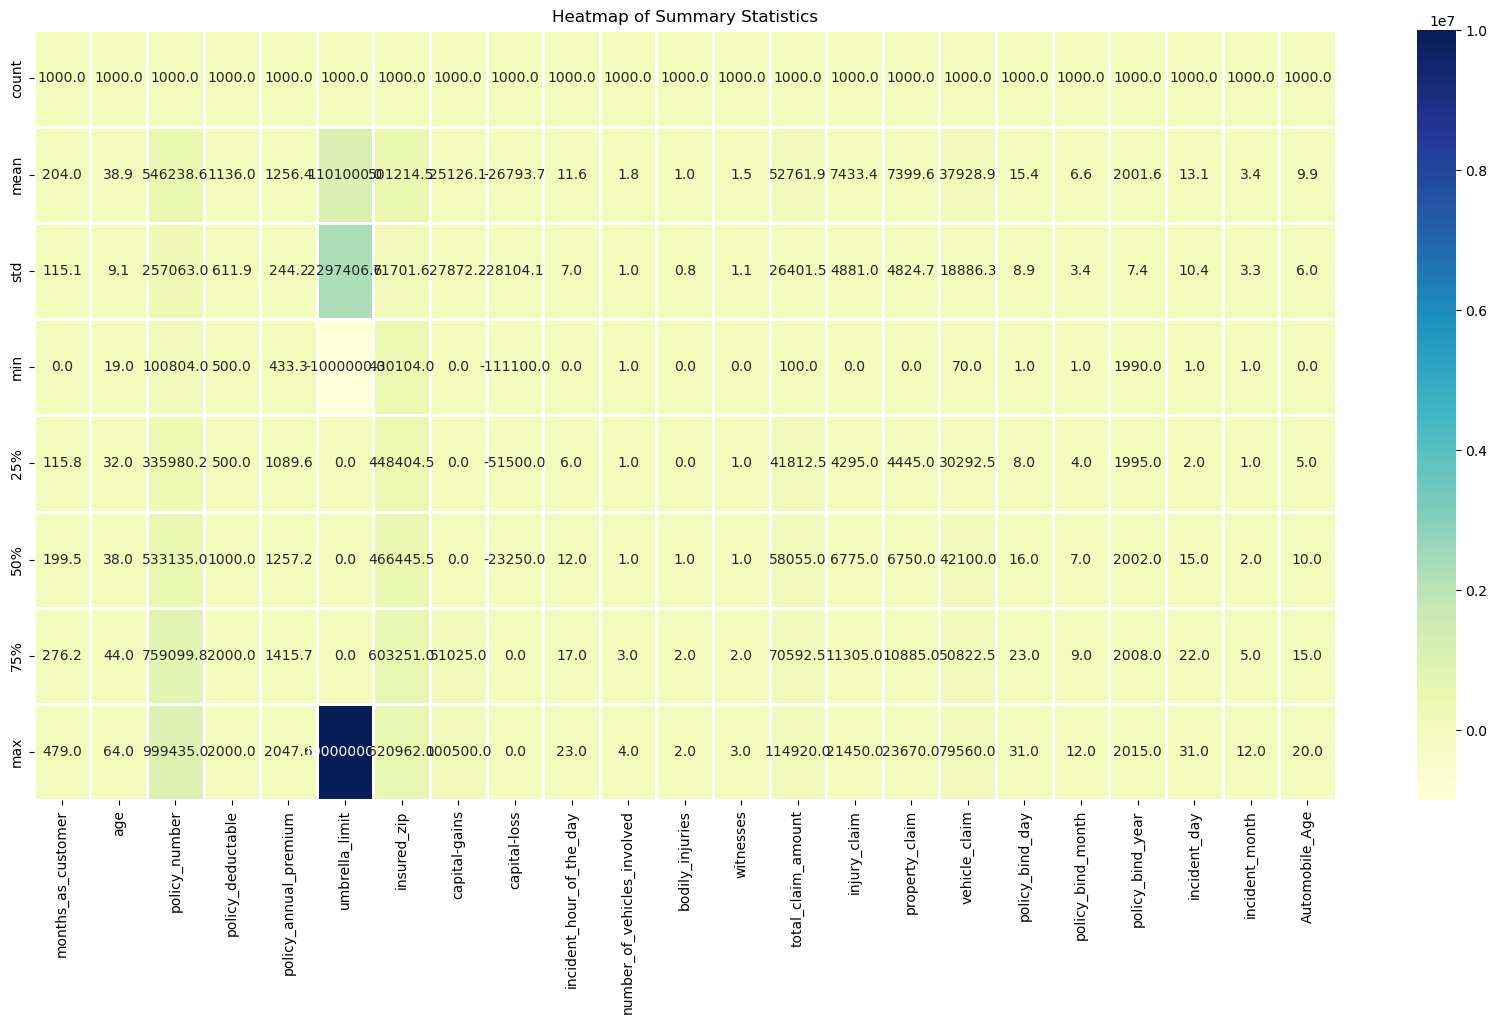

In [88]:
plt.figure(figsize=(21, 10))
sns.heatmap(df.describe(), annot=True, cmap='YlGnBu', fmt=".1f", linewidths=1.8)
plt.title('Heatmap of Summary Statistics')
plt.show()

In [89]:
df['age'].value_counts()

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

In [90]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for '{column}':")
    print(value_counts)
    print("\n")

Value counts for 'months_as_customer':
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


Value counts for 'age':
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


Value counts for 'policy_number':
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


Value counts for 'policy_state':
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


Value counts for 'policy_deduc

Value counts for 'policy_bind_month':
7     96
11    91
9     87
6     86
4     86
5     84
8     82
1     80
10    79
3     79
12    76
2     74
Name: policy_bind_month, dtype: int64


Value counts for 'policy_bind_year':
1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
2001    41
2006    41
1994    41
2005    40
1999    40
2007    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
2008    33
1993    33
2011    32
2000    31
1998    30
2015     3
Name: policy_bind_year, dtype: int64


Value counts for 'incident_day':
1     200
2     199
17     41
24     41
21     38
14     37
13     37
22     34
19     33
28     33
18     33
23     32
20     32
16     32
15     31
26     28
25     28
27     27
30     21
31     20
3      12
29     11
Name: incident_day, dtype: int64


Value counts for 'incident_month':
1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: inc

In [91]:
# Replace "No" with 0 and "Yes" with 1 in the "RainToday" column
df['fraud_reported'] = df['fraud_reported'].replace({'No': 0, 'Yes': 1})

# Display the updated DataFrame
print(df['fraud_reported'])

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object


In [92]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<Axes: xlabel='fraud_reported', ylabel='count'>

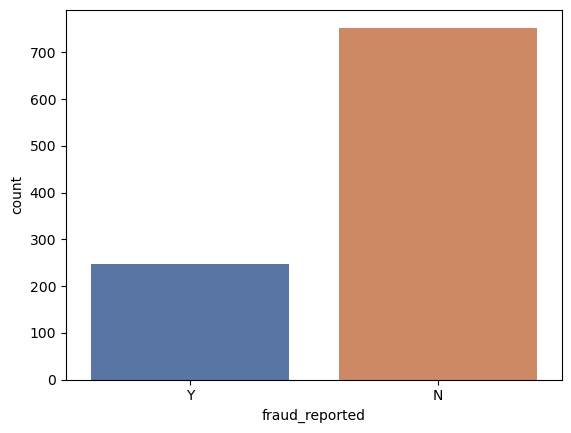

In [93]:
sns.countplot(x='fraud_reported',data=df)

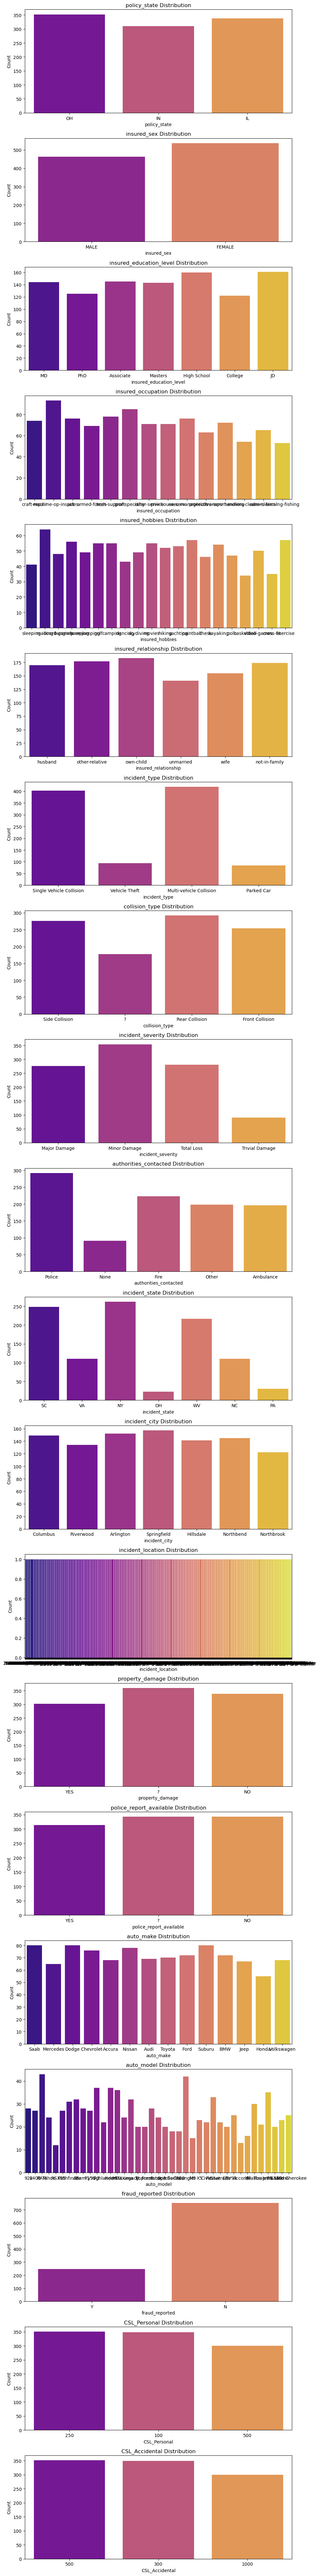

In [94]:
categorical_features = df.select_dtypes(include=['object'])

# Set up subplots for categorical features
num_features = len(categorical_features.columns)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 4 * num_features))

palette_name = "plasma"

# Create subplots for each categorical feature
for i, col in enumerate(categorical_features.columns):
    sns.countplot(x=col, data=df, ax=axes[i],palette=palette_name)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

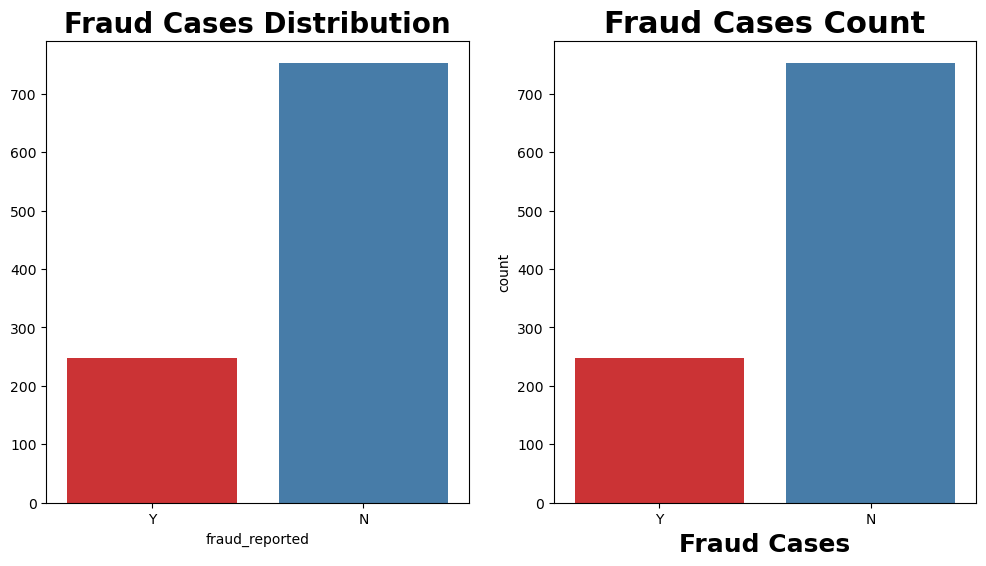

In [95]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create a countplot of fraud cases distribution
sns.countplot(x='fraud_reported', data=df, ax=ax[0], palette='Set1')
ax[0].set_title('Fraud Cases Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Create a countplot of fraud cases count
sns.countplot(x='fraud_reported', data=df, ax=ax[1], palette='Set1')
ax[1].set_title('Fraud Cases Count', fontsize=22, fontweight='bold')
ax[1].set_xlabel("Fraud Cases", fontsize=18, fontweight='bold')

plt.show()

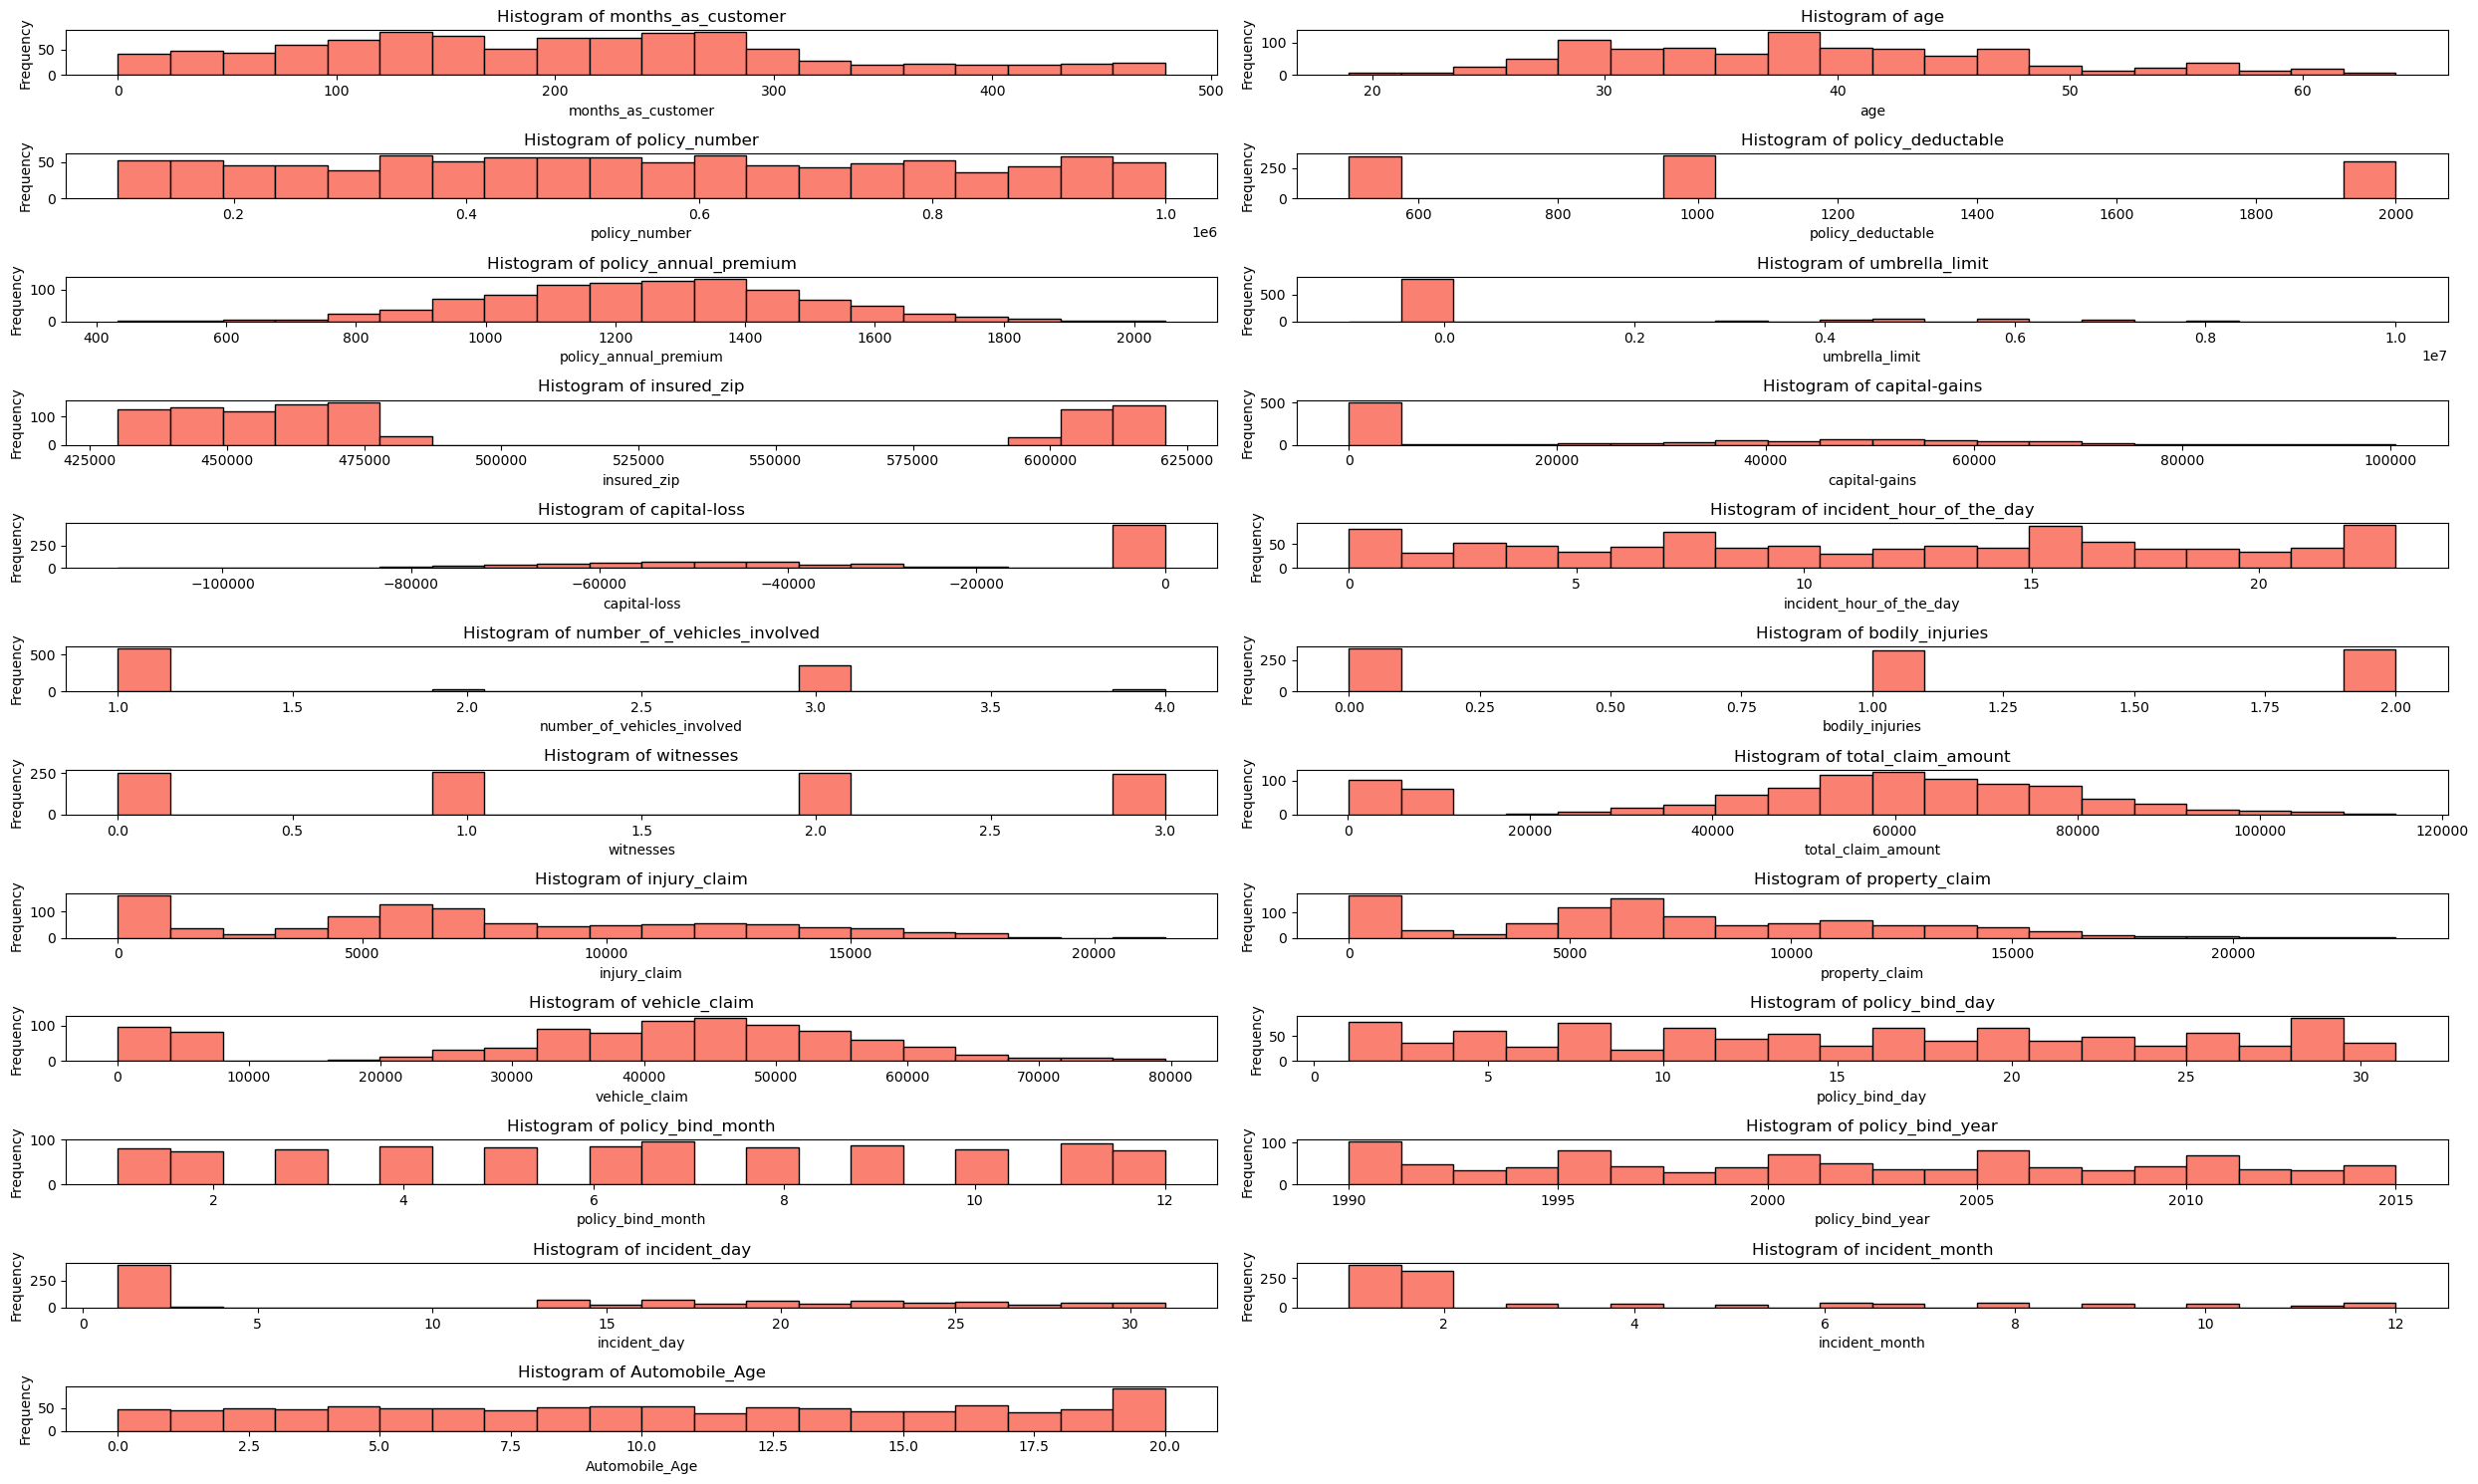

In [96]:
numerical_features = df.select_dtypes(include=['number'])

# Create histograms for numerical features
num_features = len(numerical_features.columns)
num_rows = (num_features + 1) // 2  # Adjust the number of rows for subplots

plt.figure(figsize=(25,15))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(num_rows, 2, i + 1)
    plt.hist(df[col], bins=20, color='salmon', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

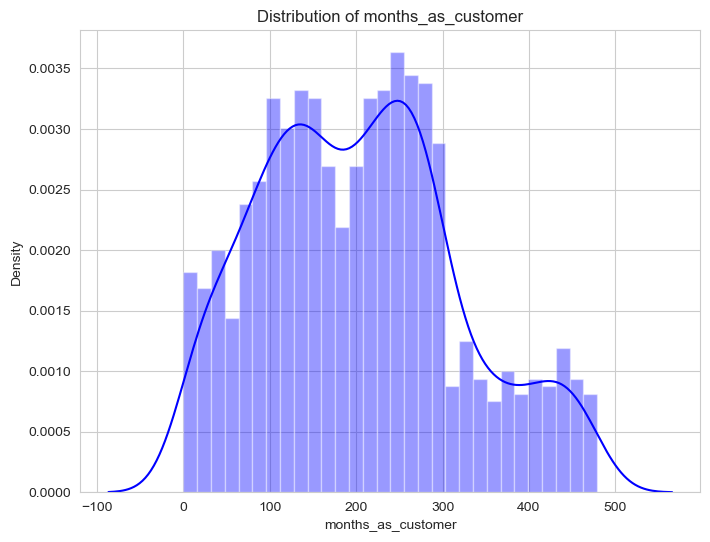

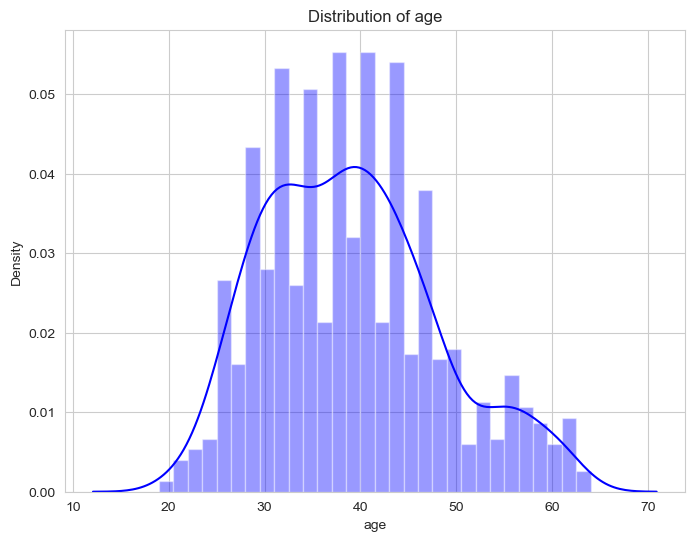

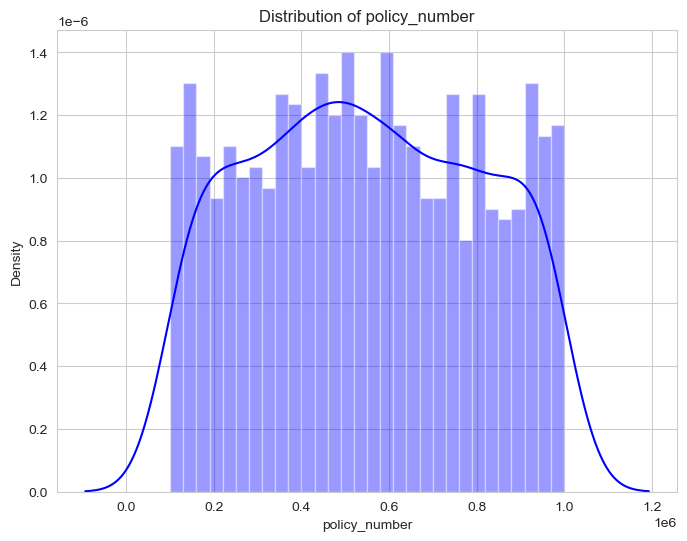

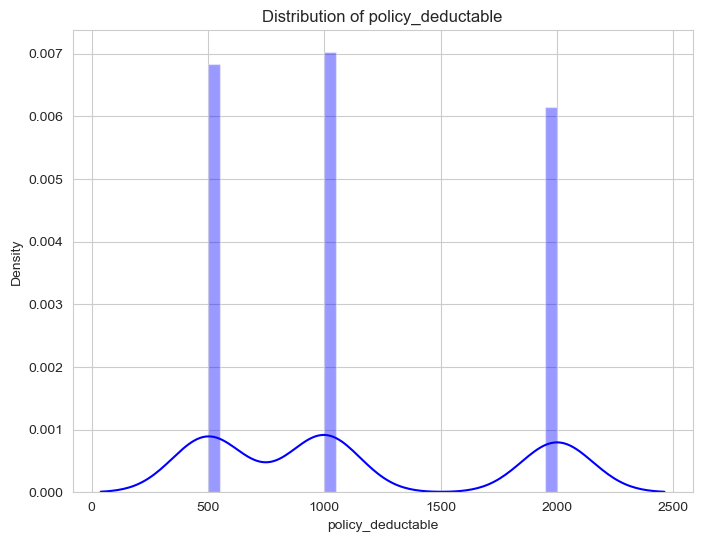

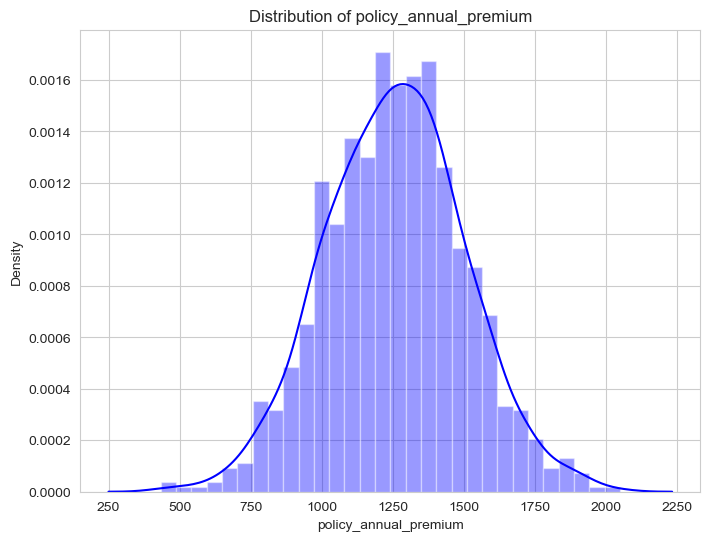

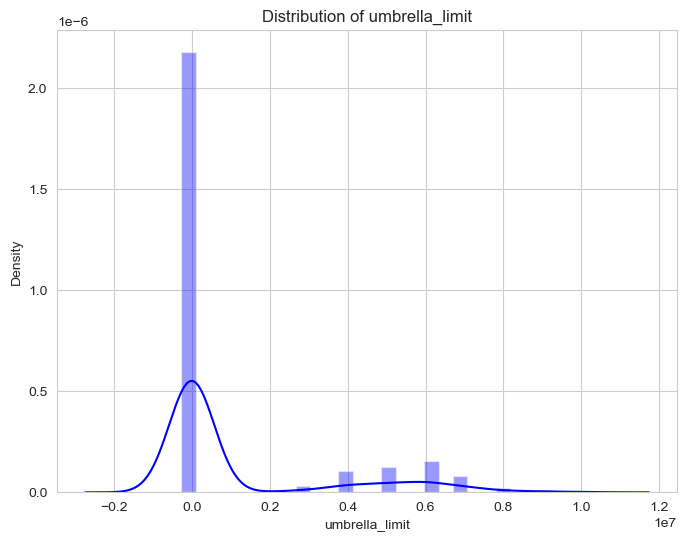

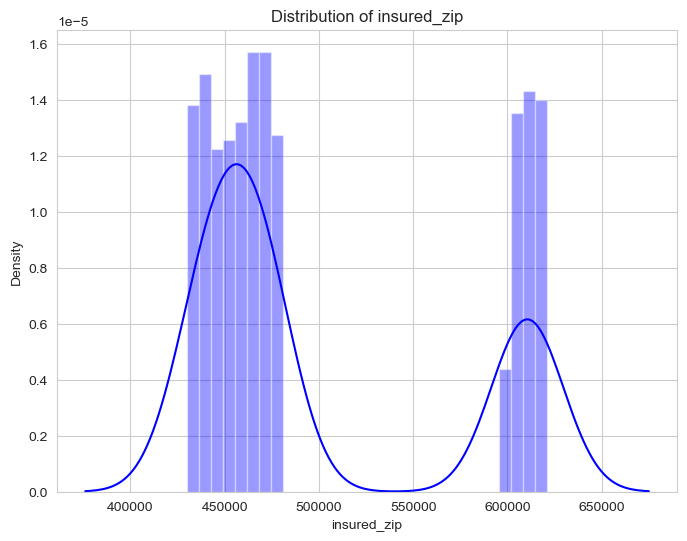

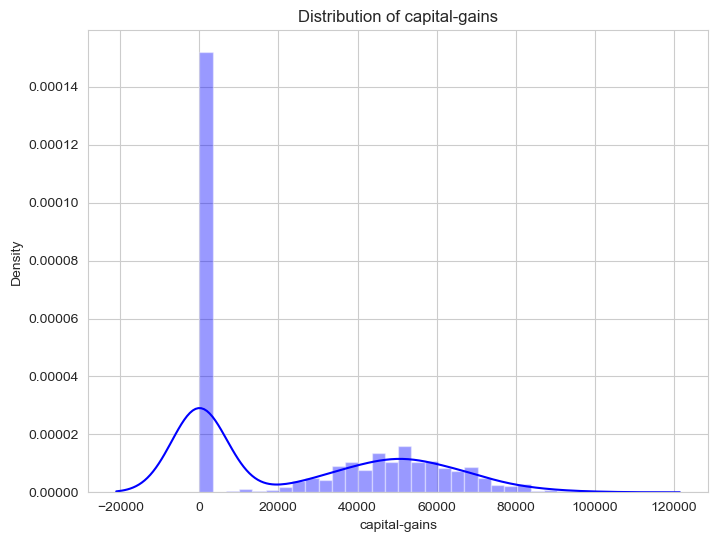

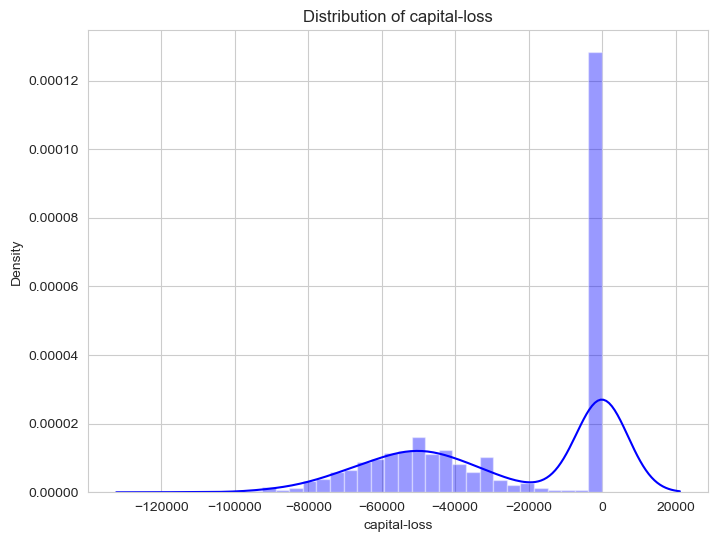

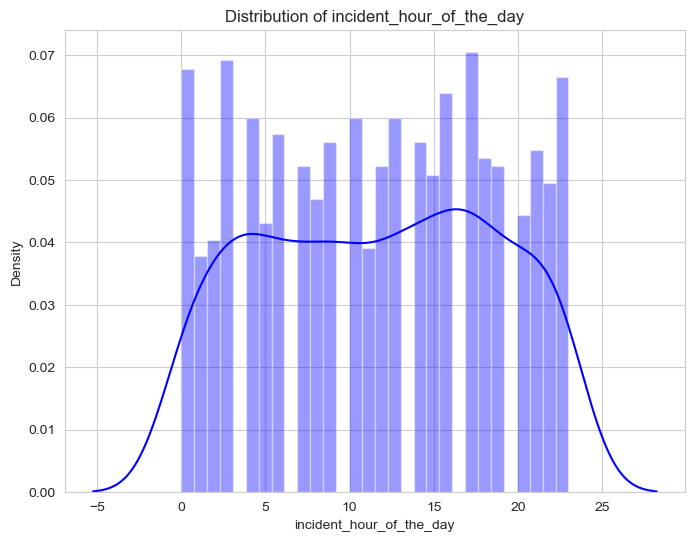

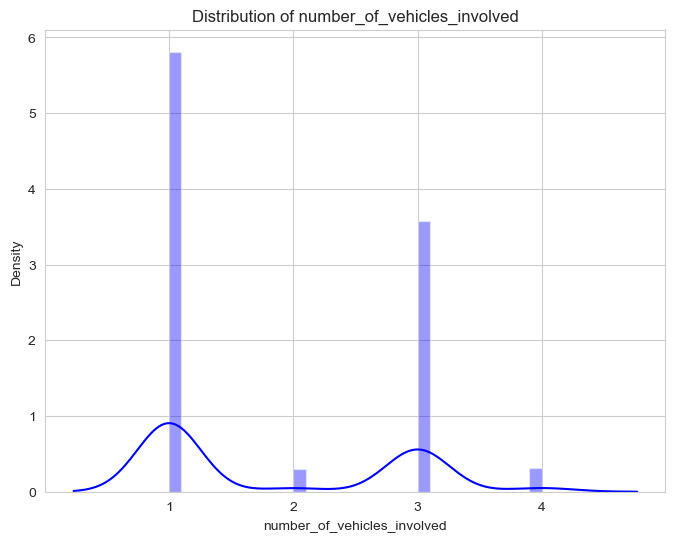

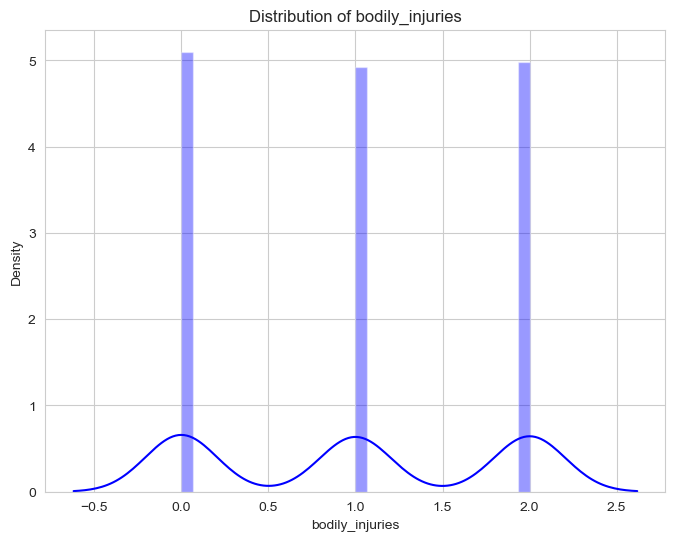

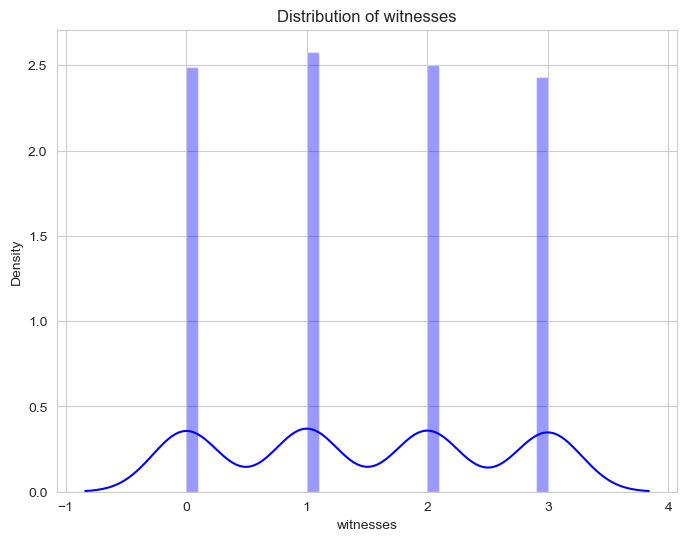

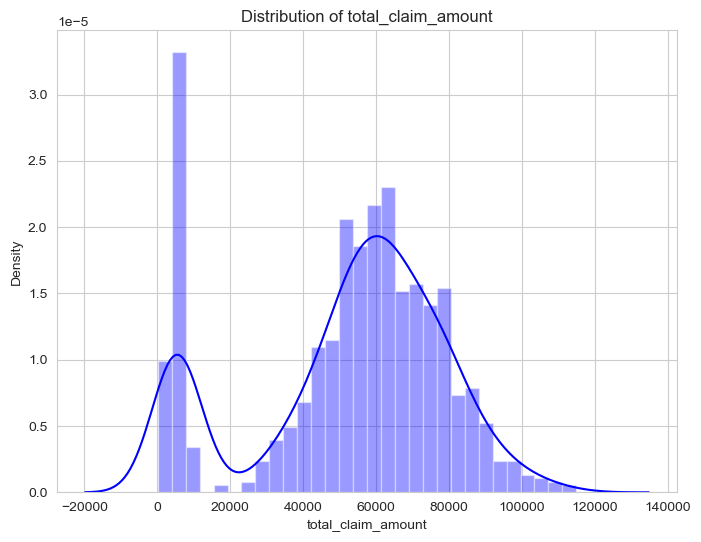

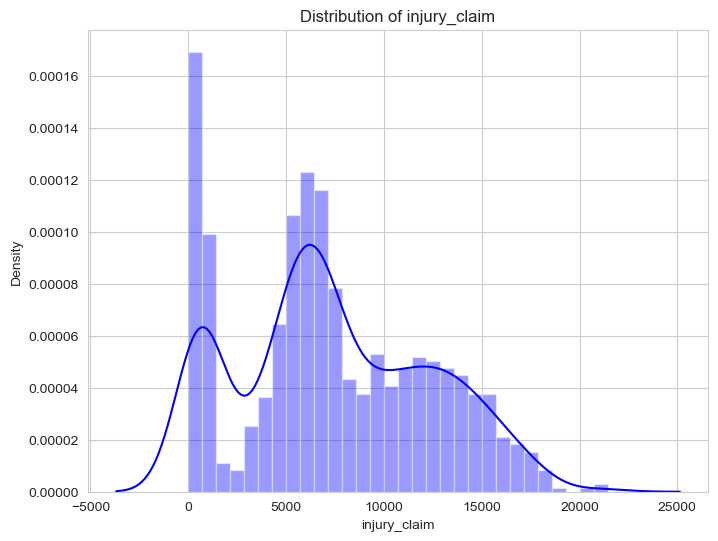

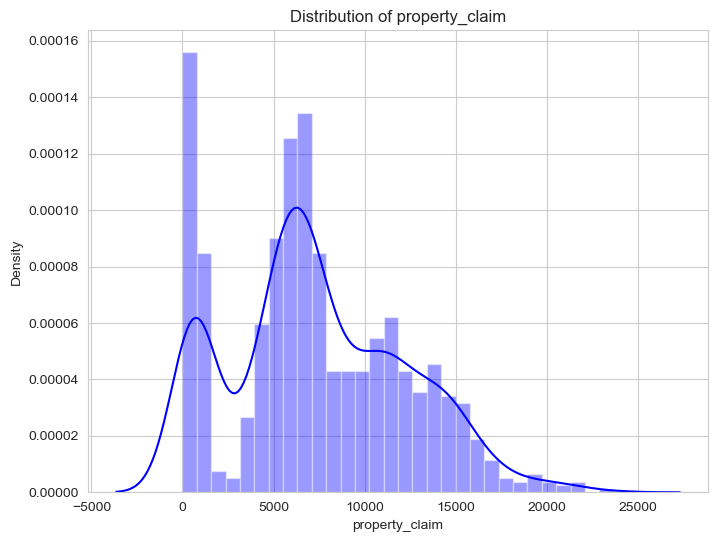

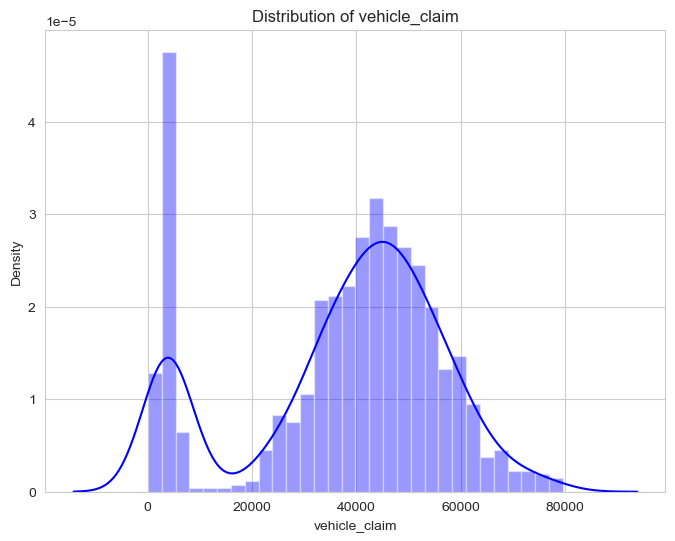

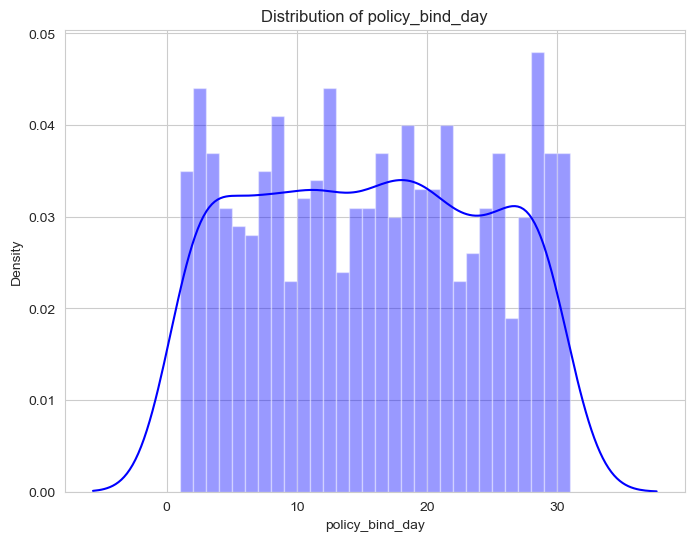

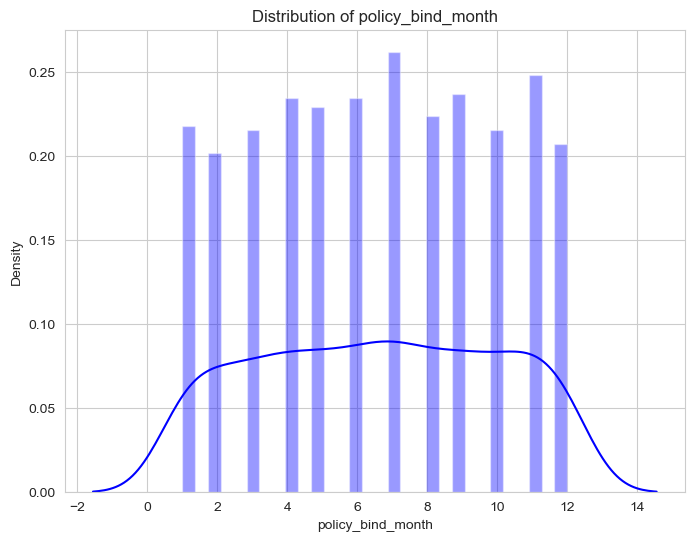

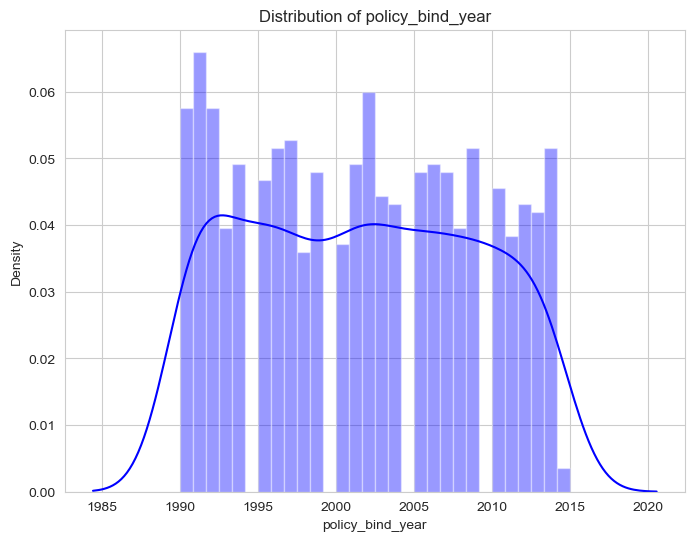

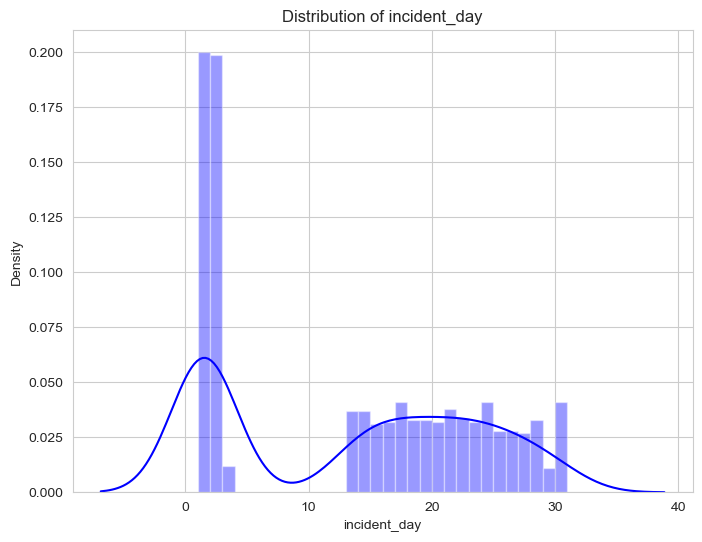

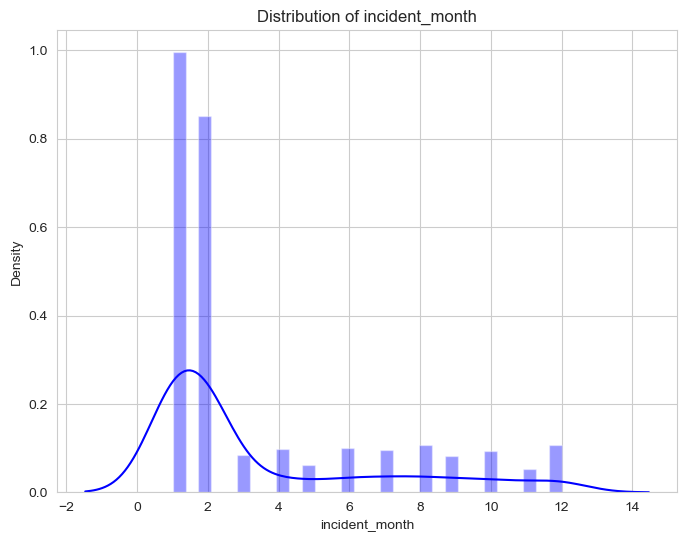

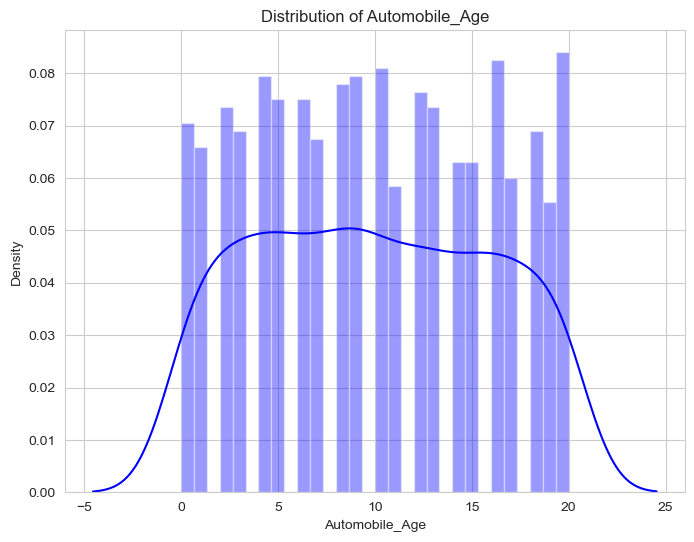

In [97]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])

sns.set_style("whitegrid")

for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], bins=30, kde=True, color='blue')
    
    
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Distribution of {column}')
    
    
    plt.show()

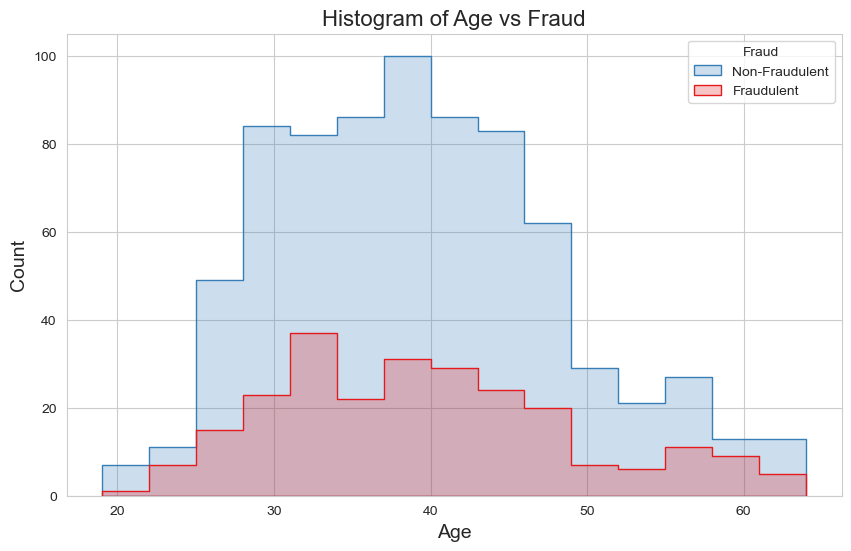

In [98]:
# Create a histogram of 'Age' with differentiation for fraud cases
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='fraud_reported', bins=15, element='step', common_norm=False, palette='Set1')
plt.title('Histogram of Age vs Fraud', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

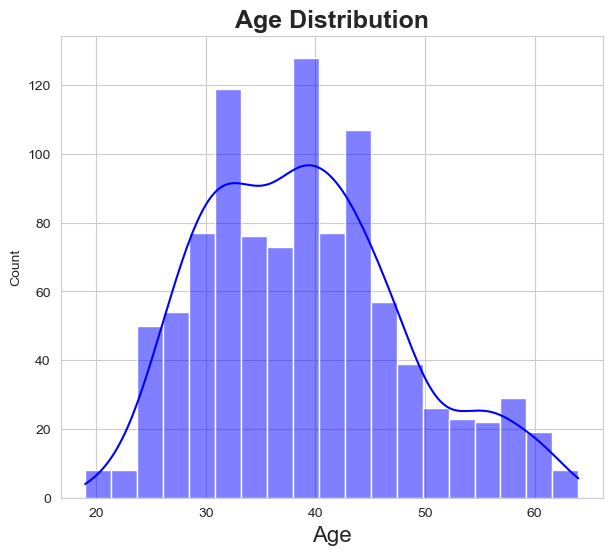

In [99]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

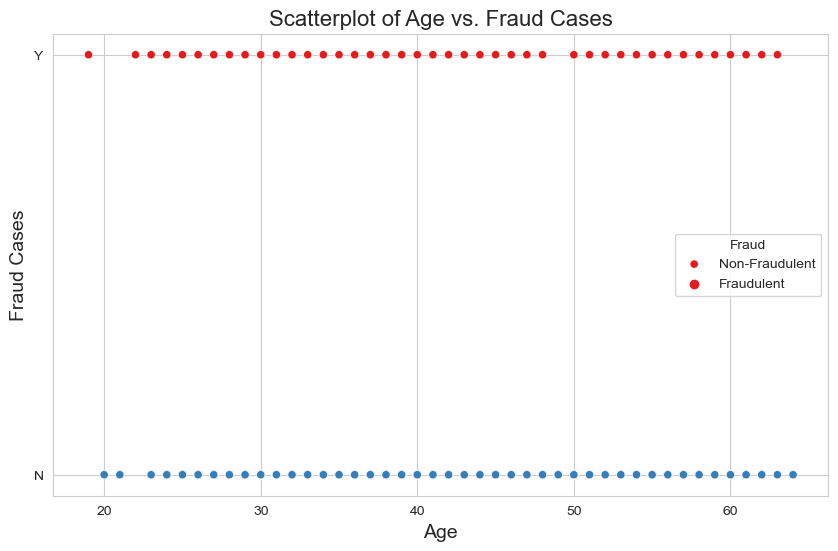

In [100]:
# scatterplot of 'Age' vs. 'fraud_reported'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='fraud_reported', hue='fraud_reported', palette='Set1', marker='o')
plt.title('Scatterplot of Age vs. Fraud Cases', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fraud Cases', fontsize=14)
plt.legend(title='Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

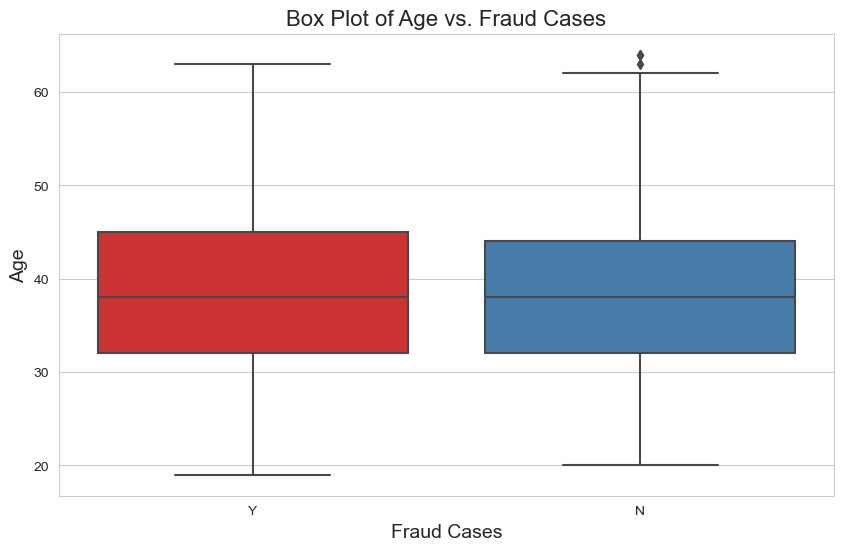

In [101]:
# Create a box plot of 'Age' vs. 'fraud_reported'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='fraud_reported', y='age', palette='Set1')
plt.title('Box Plot of Age vs. Fraud Cases', fontsize=16)
plt.xlabel('Fraud Cases', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

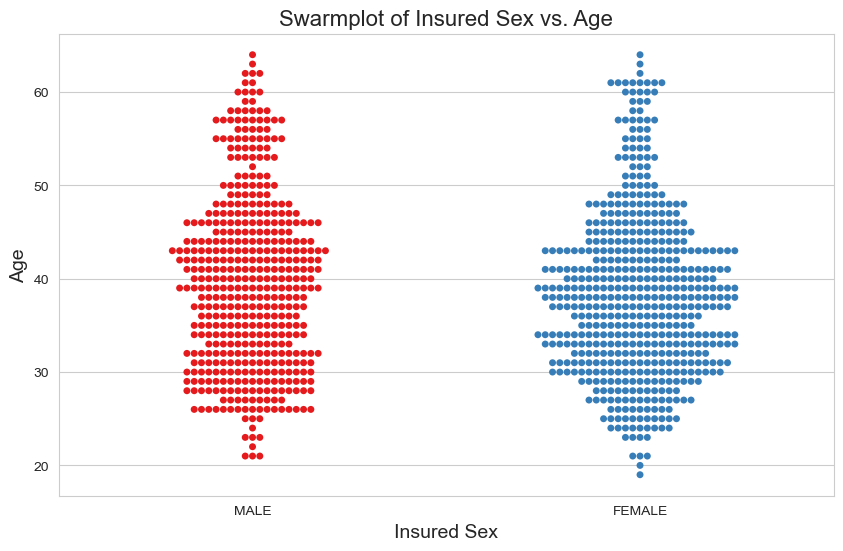

In [102]:
# Create a swarmplot for 'insured_sex' vs. 'age'
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='insured_sex', y='age', palette='Set1')
plt.title('Swarmplot of Insured Sex vs. Age', fontsize=16)
plt.xlabel('Insured Sex', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

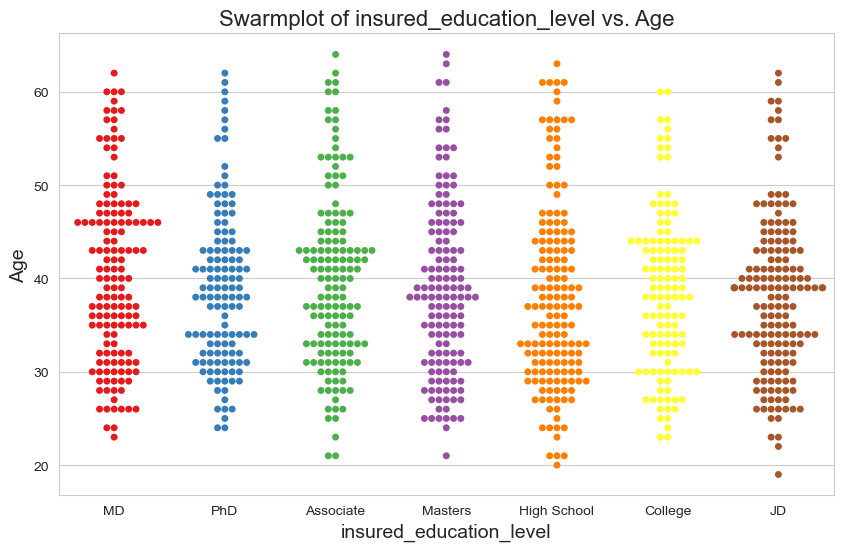

In [103]:
# Create a swarmplot for 'insured_sex' vs. 'age'
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='insured_education_level', y='age', palette='Set1')
plt.title('Swarmplot of insured_education_level vs. Age', fontsize=16)
plt.xlabel('insured_education_level', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

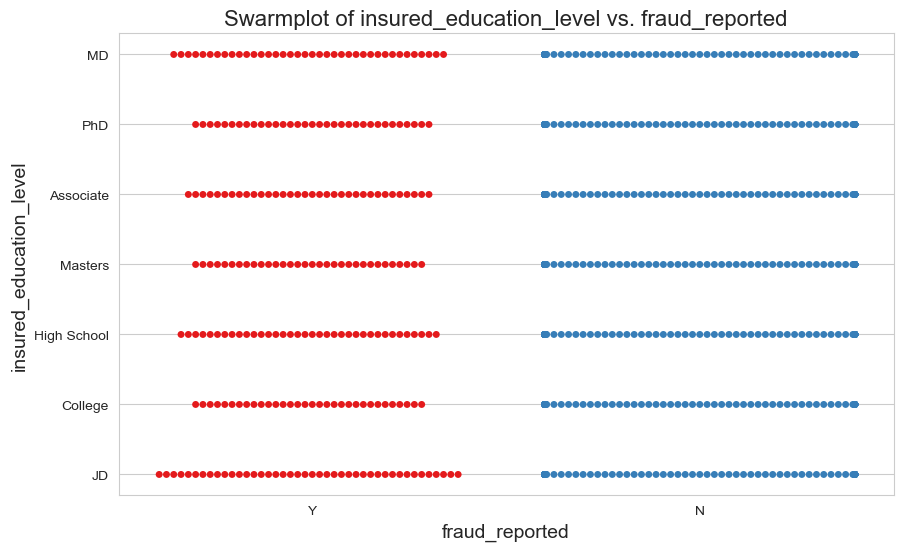

In [104]:
# Create a swarmplot for 'insured_sex' vs. 'age'
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='fraud_reported', y='insured_education_level', palette='Set1')
plt.title('Swarmplot of insured_education_level vs. fraud_reported', fontsize=16)
plt.xlabel('fraud_reported', fontsize=14)
plt.ylabel('insured_education_level', fontsize=14)
plt.show()

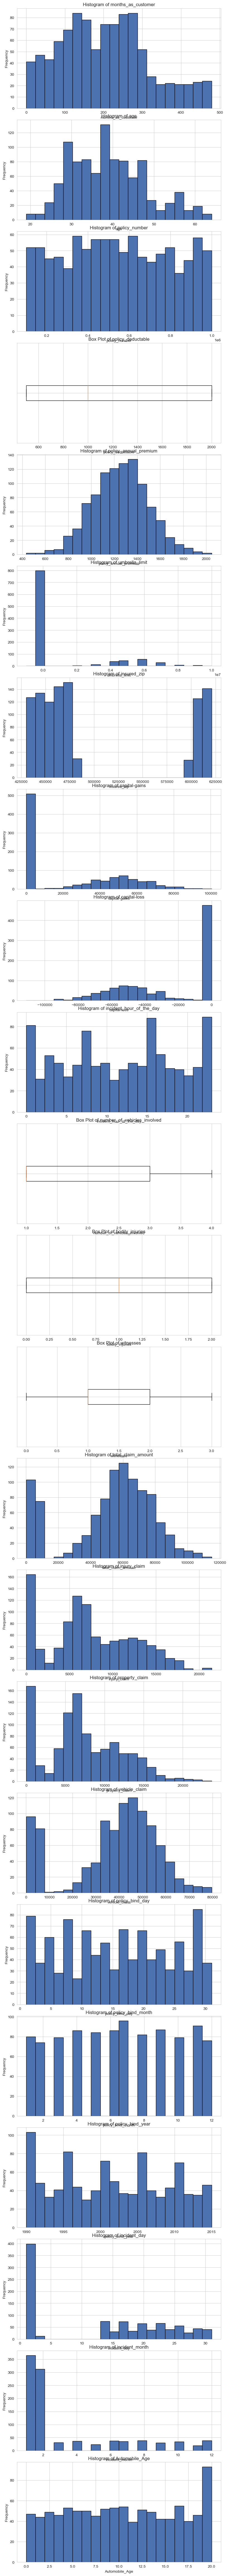

In [105]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

# Create subplots for all numeric columns
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(8, 4 * len(numeric_columns)))
fig.tight_layout()

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    data = df[col]

    if len(data.unique()) > 10:
        ax.hist(data, bins=20, edgecolor='k')
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    else:
        ax.boxplot(data, vert=False)
        ax.set_title(f'Box Plot of {col}')
        ax.set_yticklabels([])
        ax.set_xlabel(col)

plt.show()

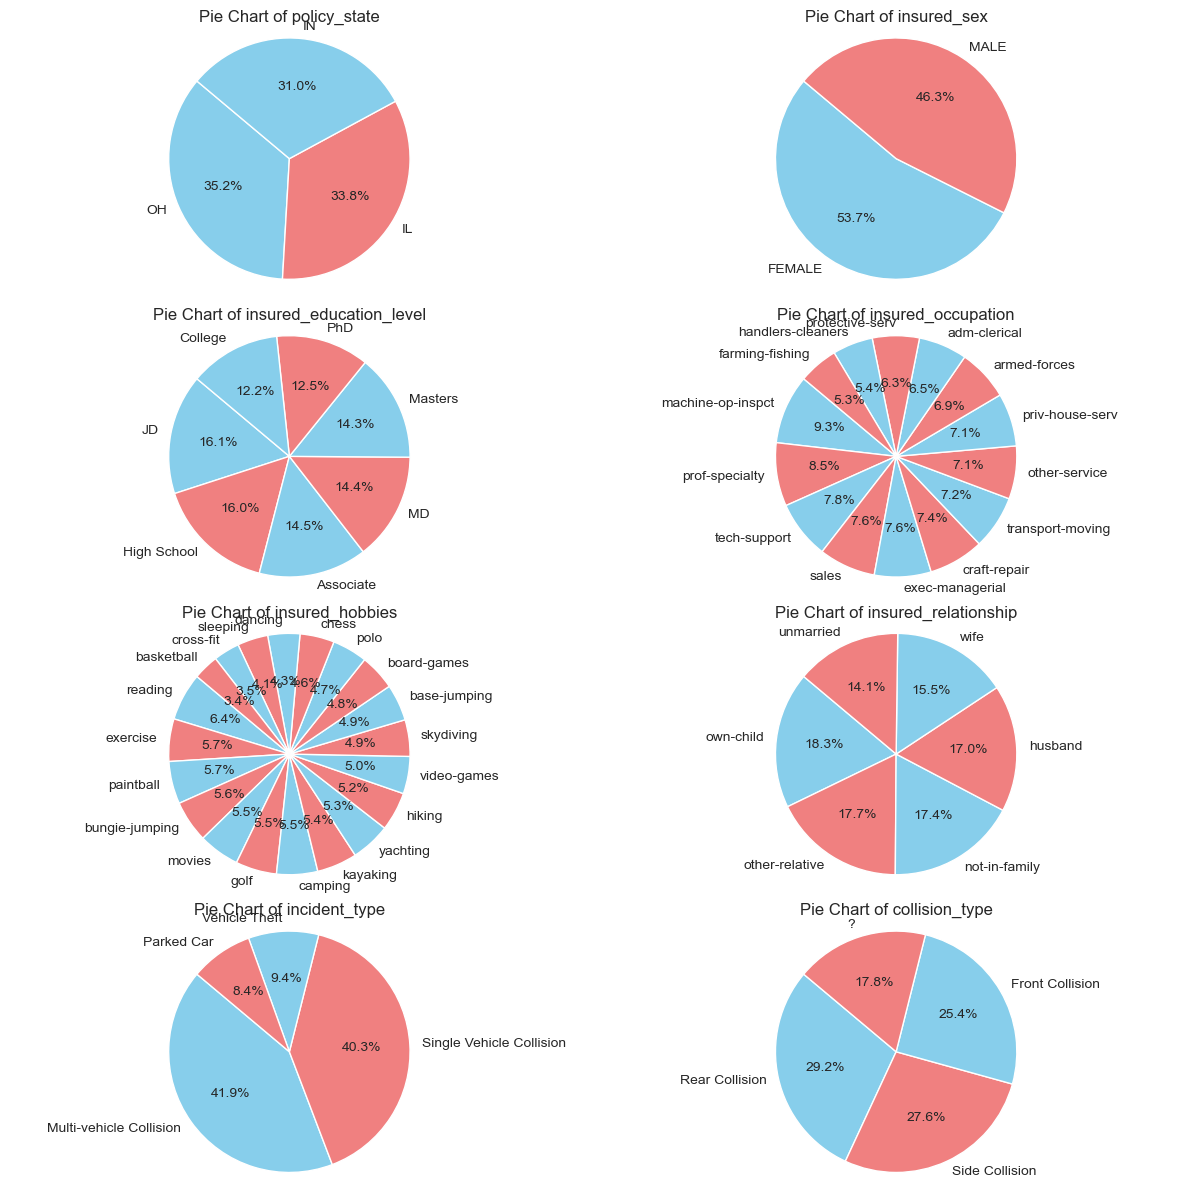

In [106]:
categorical_variables = ['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type']

# Set up subplots for pie charts
num_cols = 2  # Number of columns in the subplot grid
num_rows = (len(categorical_variables) + 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical variables and create pie charts
for i, cat_var in enumerate(categorical_variables):
    category_counts = df[cat_var].value_counts()
    ax = axes[i]  # Select the current axis
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,
           colors=['skyblue', 'lightcoral'])
    ax.set_title(f'Pie Chart of {cat_var}')
    ax.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Hide any remaining empty subplots
for j in range(len(categorical_variables), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the pie charts
plt.show()

# Outlier Detection and Removal

In [107]:
from scipy import stats
feature = df[['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_bind_day', 'policy_bind_month', 'policy_bind_year',
       'incident_day', 'incident_month', 'Automobile_Age']]

z = abs(stats.zscore(feature))
z

months_as_customer       age  policy_number  policy_deductable  \
0              1.078140  0.990836       0.095953           0.222383   
1              0.208995  0.334073       0.791527           1.412784   
2              0.608002  1.088913       0.550566           1.412784   
3              0.452355  0.224613       1.239334           1.412784   
4              0.208995  0.552994       0.695834           0.222383   
..                  ...       ...            ...                ...   
995            1.746582  0.103769       1.539740           0.222383   
996            0.704407  0.224613       1.398429           0.222383   
997            0.642767  0.541611       1.448920           1.039966   
998            2.208028  2.523284       0.047867           1.412784   
999            2.190645  2.304363       0.038303           0.222383   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                 0.616705        0.479476     0.489529       1.011331   
1                 0.242521        1.697980     0.461008       0.901927   
2                 0.642233        1.697980     0.984885       0.358023   
3                 0.652886        2.133471     1.491682       0.853388   
4                 1.341980        2.133471     1.527808       1.467210   
..                     ...             ...          ...            ...   
995               0.222884        0.479476     0.975717       0.901927   
996               0.739141        0.479476     1.492519       1.643100   
997               0.520739        0.826998     0.815138       0.358023   
998               0.411866        1.697980     0.830250       0.901927   
999               2.008710        0.479476     1.549492       0.901927   

     capital-loss  incident_hour_of_the_day  ...  total_claim_amount  \
0        0.953851                  0.956261  ...            0.714257   
1        0.953851                  0.524475  ...            1.807312   
2        0.953851                  0.668404  ...            0.686362   
3        1.267577                  0.956261  ...            0.403135   
4        0.683741                  1.202666  ...            1.753121   
..            ...                       ...  ...                 ...   
995      0.953851                  1.202666  ...            1.305049   
996      0.953851                  1.634452  ...            2.111466   
997      0.953851                  1.100189  ...            0.558507   
998      0.953851                  1.388046  ...            0.219110   
999      0.953851                  0.812332  ...            1.807691   

     injury_claim  property_claim  vehicle_claim  policy_bind_day  \
0        0.189283        1.165505       0.749653         0.175451   
1        1.363822        1.372696       1.823346         1.305938   
2        0.054644        0.736072       0.785565         0.728938   
3        0.224130        0.219722       0.677607         1.079841   
4        1.257232        1.399654       1.768252         1.068084   
..            ...             ...            ...              ...   
995      2.051155        0.273817       1.224309         0.062403   
996      2.182342        2.214794       1.821868         1.633327   
997      0.013648        0.020826       0.771902         0.175451   
998      0.453708        0.451976       0.073580         0.288500   
999      1.429416        1.343664       1.814340         0.502840   

     policy_bind_month  policy_bind_year  incident_day  incident_month  \
0             1.015026          1.684992      1.141603        0.735040   
1             0.164894          0.597550      0.758386        0.735040   
2             0.164894          0.218032      0.854190        0.429664   
3             0.459874          1.577335      1.157698        2.013343   
4             0.164894          1.684992      0.375169        0.429664   
..                 ...               ...           ...             ...   
995           0.130086          1.441405      0.854

In [108]:
new_df = df[(z < 3).all(axis=1)]
new_df

months_as_customer  age  policy_number policy_state  policy_deductable  \
0                   328   48         521585           OH               1000   
1                   228   42         342868           IN               2000   
2                   134   29         687698           OH               2000   
3                   256   41         227811           IL               2000   
4                   228   44         367455           IL               1000   
..                  ...  ...            ...          ...                ...   
995                   3   38         941851           OH               1000   
996                 285   41         186934           IL               1000   
997                 130   34         918516           OH                500   
998                 458   62         533940           IL               2000   
999                 456   60         556080           OH               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level  ... auto_model fraud_reported CSL_Personal  \
0                        MD  ...        92x              Y          250   
1                        MD  ...       E400              Y          250   
2                       PhD  ...        RAM              N          100   
3                       PhD  ...      Tahoe              Y          250   
4                 Associate  ...        RSX              N          500   
..                      ...  ...        ...            ...          ...   
995                 Masters  ...     Accord              N          500   
996                     PhD  ...     Passat              N          100   
997                 Masters  ...    Impreza              N          250   
998               Associate  ...         A5              N          500   
999               Associate  ...       E400              N          250   

     CSL_Accidental  policy_bind_day policy_bind_month policy_bind_year  \
0               500               17                10             2014   
1               500               27                 6             2006   
2               300                9                 6             2000   
3               500               25                 5             1990   
4              1000                6                 6             2014   
..              ...              ...               ...              ...   
995            1000               16                 7             1991   
996             300                1                 5             2014   
997             500               17                 2             2003   
998            1000               18                11             2011   
999             500               11                11             1996   

    incident_day incident_month Automobile_Age  
0             25              1             11  
1             21              1              8  
2             22              2              8  
3              1             10              1  
4             17              2              6  
..           ...            ...            ...  
995           22              2              9  
996      

# skewness

In [109]:
new_df.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
CSL_Personal                   0.418968
CSL_Accidental                 0.614882
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522


In [110]:
new_df["umbrella_limit"] = np.log1p(new_df["umbrella_limit"])
new_df["incident_month"] = np.log1p(new_df["incident_month"])

In [111]:
new_df.skew().sort_values()

vehicle_claim                 -0.620936
total_claim_amount            -0.593593
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
policy_bind_month             -0.024643
bodily_injuries                0.003757
witnesses                      0.026211
policy_bind_day                0.028152
policy_annual_premium          0.035964
policy_number                  0.036283
Automobile_Age                 0.054522
incident_day                   0.055443
policy_bind_year               0.065022
injury_claim                   0.271759
property_claim                 0.361356
months_as_customer             0.362608
CSL_Personal                   0.418968
capital-gains                  0.466619
age                            0.475385
policy_deductable              0.476090
number_of_vehicles_involved    0.509725
CSL_Accidental                 0.614882
insured_zip                    0.837283
incident_month                 0.846049
umbrella_limit                 1.584272


# Encoding the data

In [112]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
new_df[categorical_cols]= new_df[categorical_cols].apply(le.fit_transform)
new_df

months_as_customer  age  policy_number  policy_state  policy_deductable  \
0                   328   48         521585             2               1000   
1                   228   42         342868             1               2000   
2                   134   29         687698             2               2000   
3                   256   41         227811             0               2000   
4                   228   44         367455             0               1000   
..                  ...  ...            ...           ...                ...   
995                   3   38         941851             2               1000   
996                 285   41         186934             0               1000   
997                 130   34         918516             2                500   
998                 458   62         533940             0               2000   
999                 456   60         556080             2               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91        0.000000       466132            1   
1                  1197.22       15.424949       468176            1   
2                  1413.14       15.424949       430632            0   
3                  1415.74       15.607270       608117            0   
4                  1583.91       15.607270       610706            1   
..                     ...             ...          ...          ...   
995                1310.80        0.000000       431289            0   
996                1436.79        0.000000       608177            0   
997                1383.49       14.914123       442797            0   
998                1356.92       15.424949       441714            1   
999                 766.19        0.000000       612260            0   

     insured_education_level  ...  auto_model  fraud_reported  CSL_Personal  \
0                          4  ...           1               1             1   
1                          4  ...          12               1             1   
2                          6  ...          30               0             0   
3                          6  ...          34               1             1   
4                          0  ...          31               0             2   
..                       ...  ...         ...             ...           ...   
995                        5  ...           6               0             2   
996                        6  ...          28               0             0   
997                        5  ...          19               0             1   
998                        0  ...           5               0             2   
999                        0  ...          12               0             1   

     CSL_Accidental  policy_bind_day  policy_bind_month  policy_bind_year  \
0                 2               17                 10              2014   
1                 2               27                  6              2006   
2                 1                9                  6              2000   
3                 2               25                  5              1990   
4                 0                6                  6              2014   
..              ...              ...                ...               ...   
995               0               16                  7              1991   
996               1                1                  5              2014   
997               2               17                  2              2003   
998               0               18                 11              2011   
999               2               11                 11              1996   

     incident_day  incident_month  Automobile_Age  
0              25        0.693147              11  
1              21        0.693147               8  
2              22        1.098612               8  
3               1        2.397895               1  
4              17        1.098612            

# Correlation

In [113]:
new_df.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922960       0.061267   
age                                    0.922960  1.000000       0.062332   
policy_number                          0.061267  0.062332       1.000000   
policy_state                          -0.007183 -0.020012       0.071343   
policy_deductable                      0.031041  0.032036      -0.009812   
policy_annual_premium                 -0.003814  0.005330       0.028686   
umbrella_limit                         0.005374 -0.003501      -0.006930   
insured_zip                            0.029572  0.035864       0.004531   
insured_sex                            0.059644  0.073790       0.007069   
insured_education_level               -0.000731  0.001647      -0.033767   
insured_occupation                     0.006925  0.014798      -0.014476   
insured_hobbies                       -0.089358 -0.079099       0.031887   
insured_relationship                   0.071492  0.076129       0.021378   
capital-gains                          0.007468 -0.004529       0.013628   
capital-loss                           0.023041  0.012860      -0.005587   
incident_type                         -0.016746 -0.026286       0.007872   
collision_type                        -0.023069 -0.022674      -0.009819   
incident_severity                     -0.064094 -0.064396      -0.016051   
authorities_contacted                  0.013782  0.018441       0.021092   
incident_state                         0.015811  0.012644      -0.014040   
incident_city                         -0.006601 -0.006685      -0.026174   
incident_location                     -0.011834 -0.008950       0.015892   
incident_hour_of_the_day               0.066198  0.083720      -0.000897   
number_of_vehicles_involved            0.011831  0.020391       0.007744   
property_damage                        0.002374 -0.006900       0.001889   
bodily_injuries                       -0.007674 -0.012254      -0.006242   
witnesses                              0.063574  0.056360      -0.005587   
police_report_available                0.024521  0.019424       0.029478   
total_claim_amount                     0.058761  0.067812      -0.016199   
injury_claim                           0.065062  0.077149      -0.006386   
property_claim                         0.036660  0.062375      -0.011147   
vehicle_claim                          0.055941  0.058918      -0.018152   
auto_make                              0.049734  0.033757       0.016494   
auto_model                             0.005130  0.015322       0.064599   
fraud_reported                         0.021285  0.013279      -0.036887   
CSL_Personal                          -0.021855 -0.013323       0.042129   
CSL_Accidental                         0.007121  0.011258       0.046745   
policy_bind_day                        0.050824  0.053147       0.052670   
policy_bind_month                      0.004207  0.014492       0.001913   
policy_bind_year                      -0.041914 -0.031709      -0.041632   
incident_day                          -0.010538 -0.005843       0.050839   
incident_month                         0.017973  0.016795      -0.047606   
Automobile_Age                        -0.000869 -0.005594       0.005574   

                             policy_state  policy_deductable  \
months_as_customer              -0.007183           0.031041   
age                             -0.020012           0.032036   
policy_number                    0.071343          -0.009812   
policy_state                     1.000000           0.017612   
policy_deductable                0.017612           1.000000   
policy_annual_premium            0.015089          -0.008300   
umbrella_limit                  -0.005472           0.000404   
insured_zip                      0.020669          -0.004399   
insured_sex                     -0.018002          -0.006977   
insured_education_level         -0.027173   

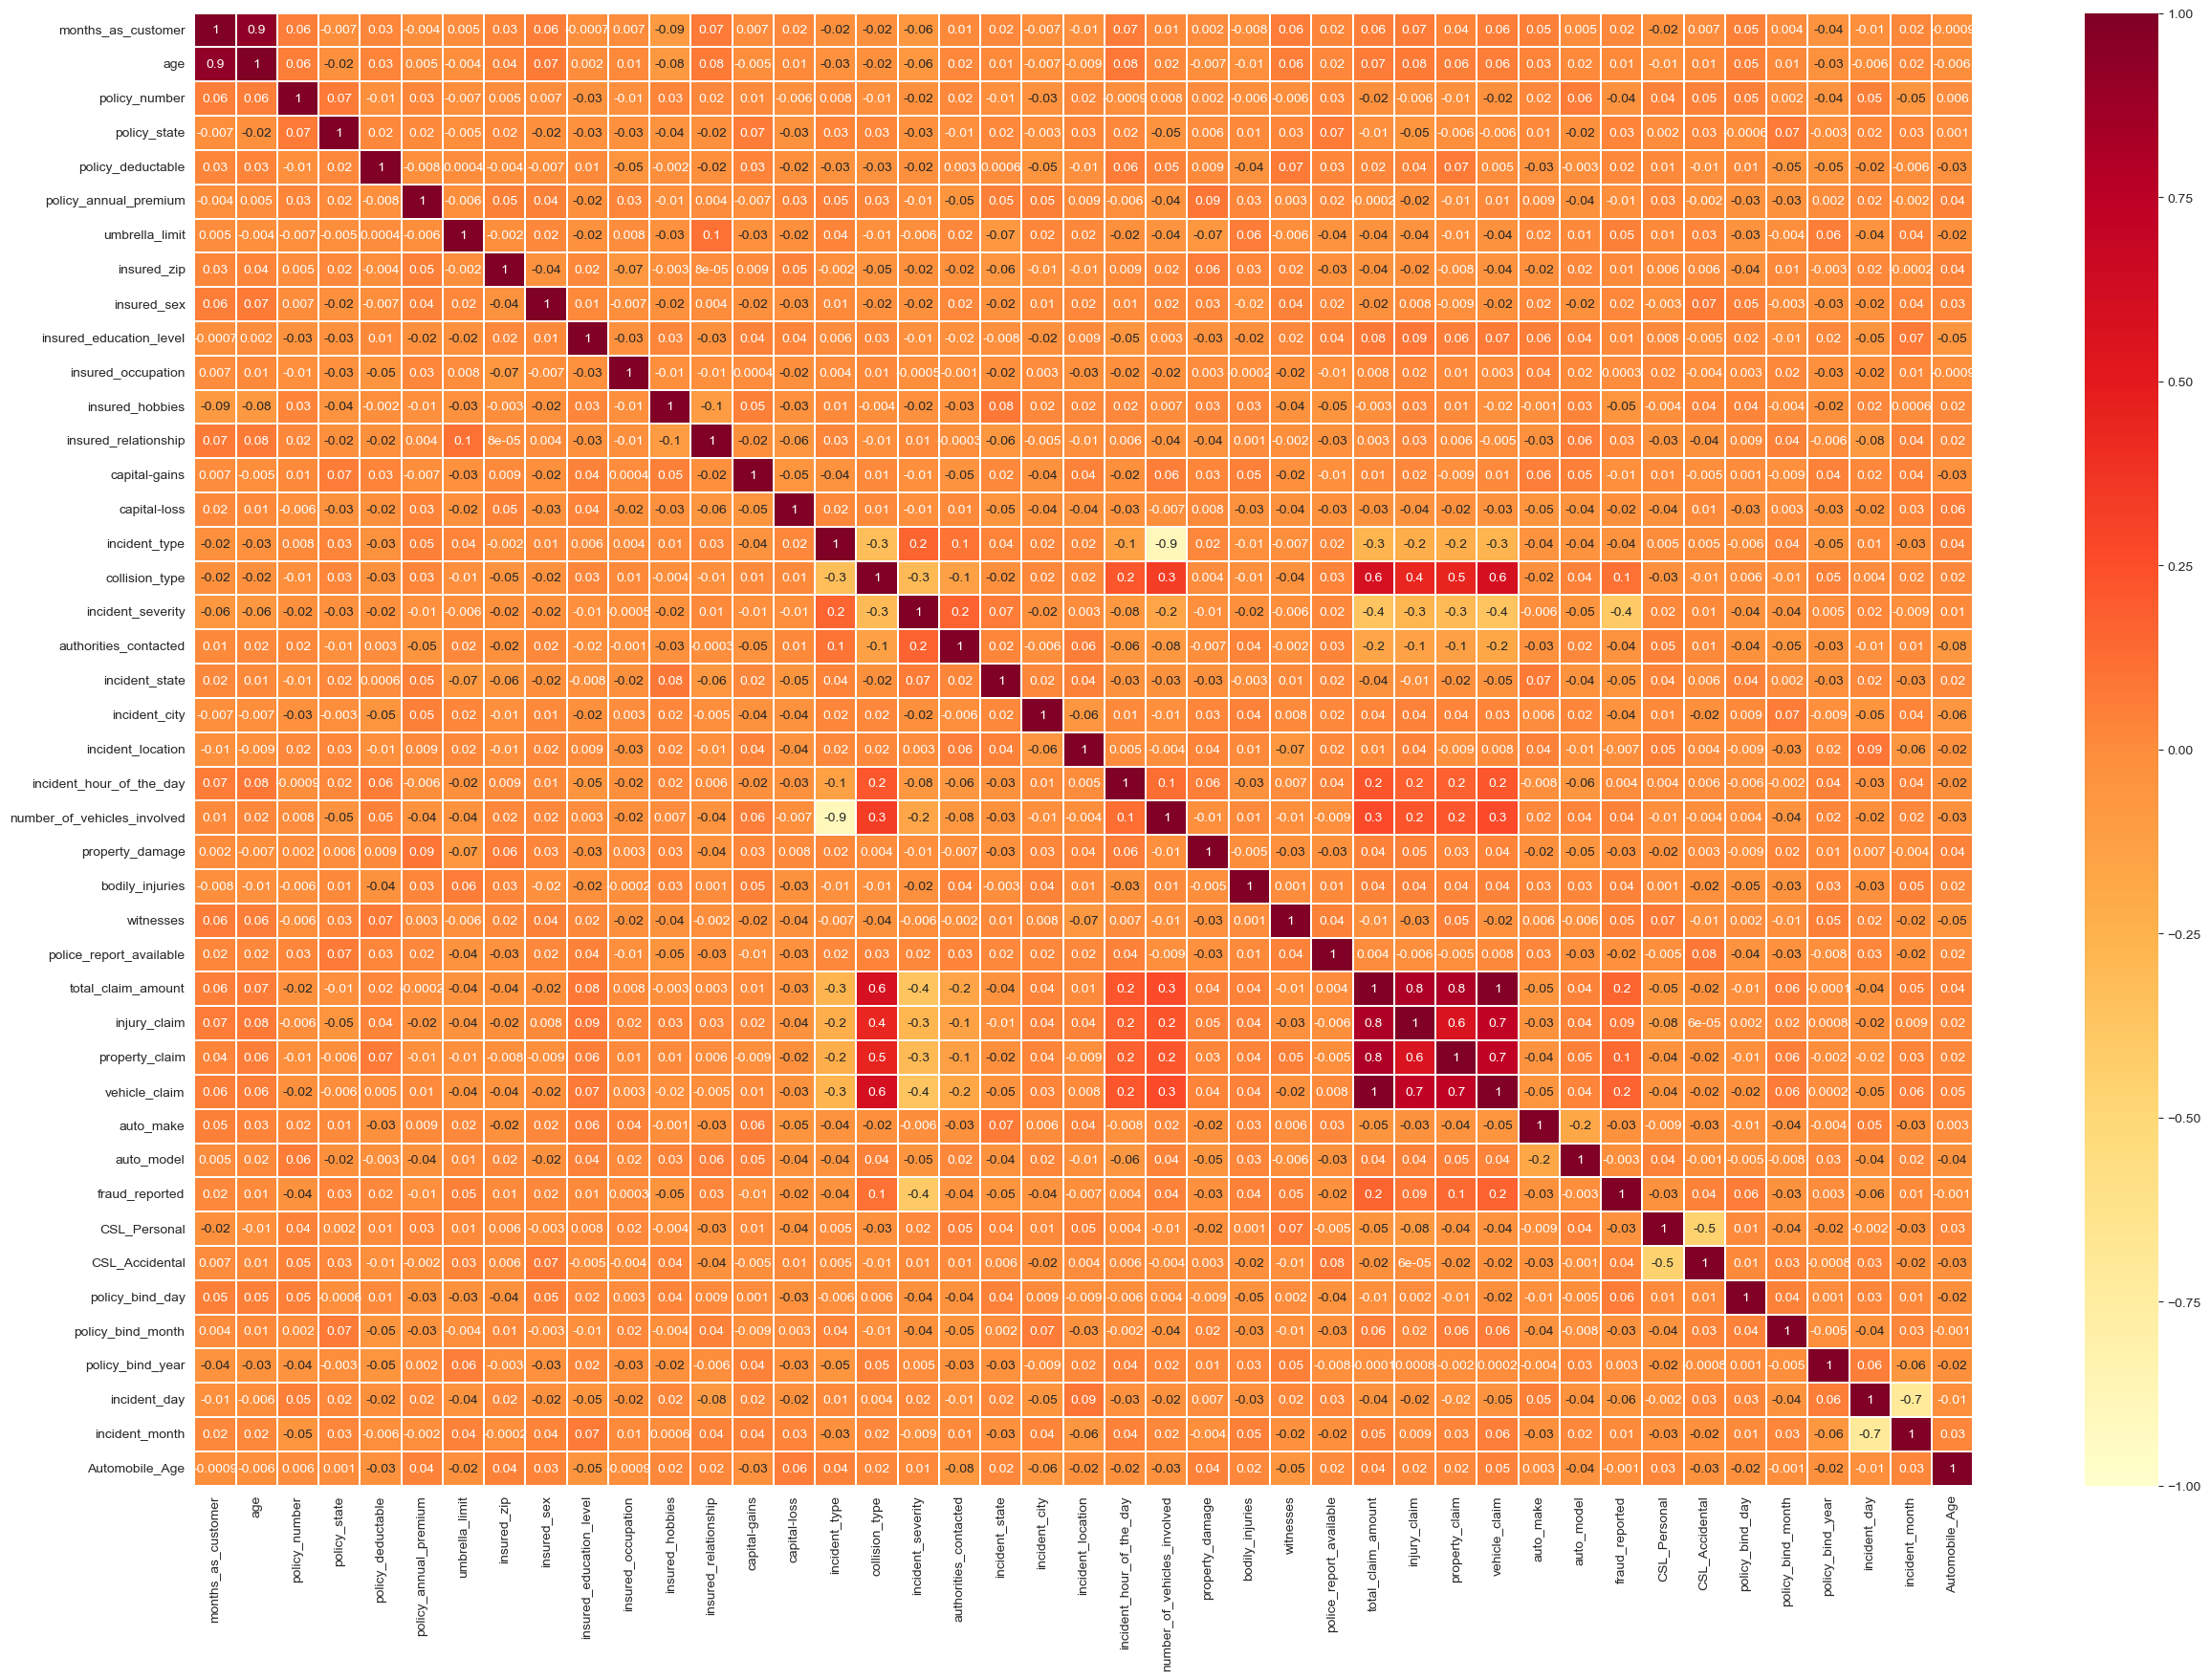

In [114]:
plt.figure(figsize=(30,20))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="white",annot=True,annot_kws={'size':10},cmap="YlOrRd")
plt.yticks(rotation=0);

In [115]:
new_df.corr()['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170782
total_claim_amount             0.163969
property_claim                 0.139101
collision_type                 0.107403
injury_claim                   0.088812
policy_bind_day                0.063705
umbrella_limit                 0.050418
witnesses                      0.049974
number_of_vehicles_involved    0.043535
CSL_Accidental                 0.042864
bodily_injuries                0.039184
policy_state                   0.034587
insured_relationship           0.026575
months_as_customer             0.021285
insured_sex                    0.020582
policy_deductable              0.015774
incident_month                 0.013837
age                            0.013279
insured_education_level        0.013116
insured_zip                    0.009699
incident_hour_of_the_day       0.004326
policy_bind_year               0.003317
insured_occupation             0.000277
Automobile_Age                -0.001152


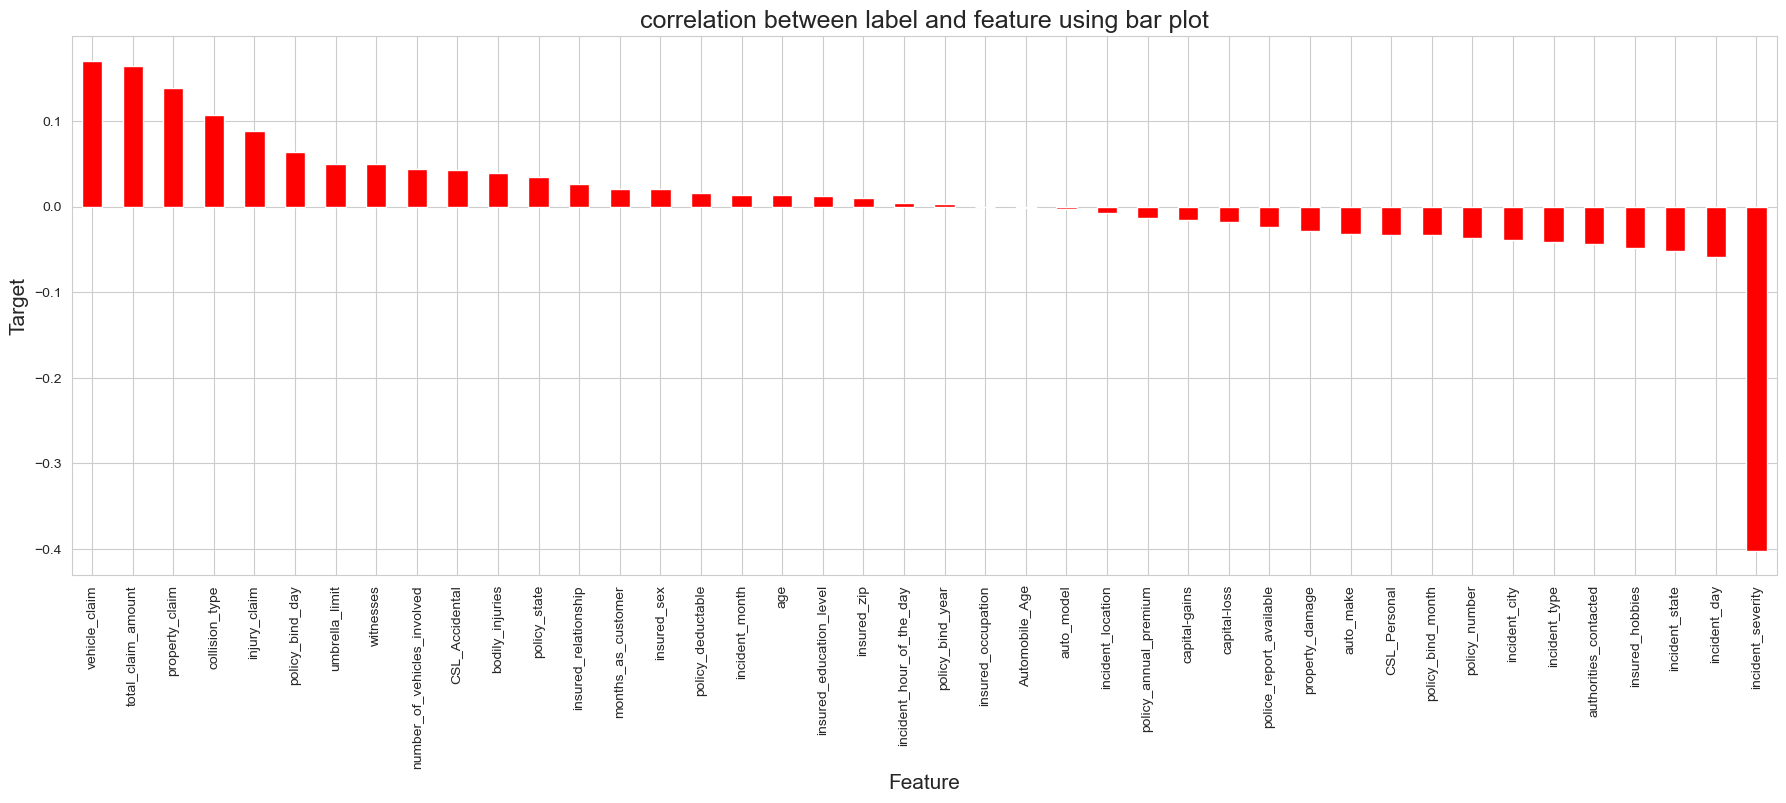

In [116]:
plt.figure(figsize=(22,7))
new_df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [117]:
x = new_df.drop("fraud_reported", axis=1)
y = new_df["fraud_reported"]

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

months_as_customer       age  policy_number  policy_state  \
0              1.069568  0.983352      -0.095774      1.179821   
1              0.202726  0.329711      -0.790245     -0.024580   
2             -0.612105 -1.086511       0.549720      1.179821   
3              0.445442  0.220771      -1.237342     -1.228980   
4              0.202726  0.547591      -0.694703     -1.228980   
..                  ...       ...            ...           ...   
975           -1.747669 -0.106050       1.537326      1.179821   
976            0.696826  0.220771      -1.396184     -1.228980   
977           -0.646779 -0.541810       1.446649      1.179821   
978            2.196463  2.508513      -0.047764     -1.228980   
979            2.179126  2.290633       0.038269      1.179821   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0            -0.224643               0.620031       -0.484220    -0.484014   
1             1.412161              -0.248448        2.062164    -0.455363   
2             1.412161               0.645834        2.062164    -0.981629   
3             1.412161               0.656603        2.092262     1.506233   
4            -0.224643               1.353117        2.092262     1.542524   
..                 ...                    ...             ...          ...   
975          -0.224643               0.221970       -0.484220    -0.972419   
976          -0.224643               0.743786       -0.484220     1.507074   
977          -1.043045               0.523032        1.977836    -0.811108   
978           1.412161               0.412986        2.062164    -0.826289   
979          -0.224643              -2.033657       -0.484220     1.564307   

     insured_sex  insured_education_level  ...  auto_make  auto_model  \
0       1.071971                 0.532901  ...   0.851959   -1.640447   
1       1.071971                 0.532901  ...   0.355279   -0.651740   
2      -0.932861                 1.556905  ...  -0.638083    0.966145   
3      -0.932861                 1.556905  ...  -0.886423    1.325675   
4       1.071971                -1.515109  ...  -1.631444    1.056027   
..           ...                      ...  ...        ...         ...   
975    -0.932861                 1.044903  ...  -0.141402   -1.191035   
976    -0.932861                 1.556905  ...   1.596980    0.786380   
977    -0.932861                 1.044903  ...   1.100300   -0.022562   
978     1.071971                -1.515109  ...  -1.383104   -1.280917   
979    -0.932861                -1.515109  ...   0.355279   -0.651740   

     CSL_Personal  CSL_Accidental  policy_bind_day  policy_bind_month  \
0        0.067231        1.180118         0.174693           1.013473   
1        0.067231        1.180118         1.308458          -0.162612   
2       -1.175916       -0.064786        -0.732320          -0.162612   
3        0.067231        1.180118         1.081705          -0.456633   
4        1.310379       -1.309689        -1.072450          -0.162612   
..            ...             ...              ...                ...   
975      1.310379       -1.309689         0.061316           0.131409   
976     -1.175916       -0.064786        -1.639333          -0.456633   
977      0.067231        1.180118         0.174693          -1.338696   
978      1.310379       -1.309689         0.288069           1.307494   
979      0.067231        1.180118        -0.505567           1.307494   

     policy_bind_year  incident_day  incident_month  Automobile_Age  
0            1.683157      1.142661       -0.924606        0.188594  
1            0.600279      0.758573       -0.924606       -0.310476  
2           -0.211879      0.854595       -0.268182       -0.310476  
3           -1.565477     -1.161866        1.835280       -1.474975  
4            1.683157      0.374486       -0.268182       -0.643190  
..                ...           ...             ...             ...  
975         -1.430118      0.85

In [119]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

# Balancing the dataset using SMOTE

In [120]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values (replace 'strategy' as needed)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Apply SMOTE to the imputed data
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x_imputed, y)

# Model Building

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=.30,random_state=190)

In [123]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7364864864864865
[[166  60]
 [ 57 161]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       226
           1       0.73      0.74      0.73       218

    accuracy                           0.74       444
   macro avg       0.74      0.74      0.74       444
weighted avg       0.74      0.74      0.74       444



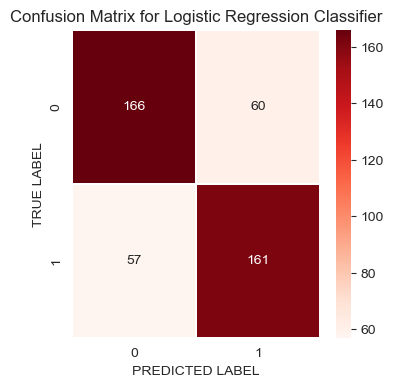

In [124]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.1, linecolor="white", fmt = ".0f", ax=ax, cmap="Reds",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Random Forest Classifier

In [125]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9009009009009009
[[212  14]
 [ 30 188]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       226
           1       0.93      0.86      0.90       218

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



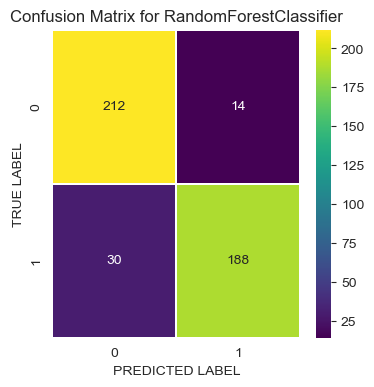

In [126]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="viridis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# AdaBoost Classifier

In [127]:
# Checking accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.8603603603603603
[[208  18]
 [ 44 174]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       226
           1       0.91      0.80      0.85       218

    accuracy                           0.86       444
   macro avg       0.87      0.86      0.86       444
weighted avg       0.87      0.86      0.86       444



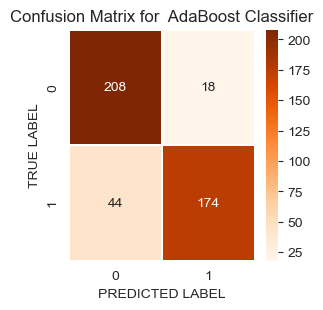

In [128]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="Oranges",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# Gradient Boosting Classifier

In [129]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.9031531531531531
[[207  19]
 [ 24 194]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       226
           1       0.91      0.89      0.90       218

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



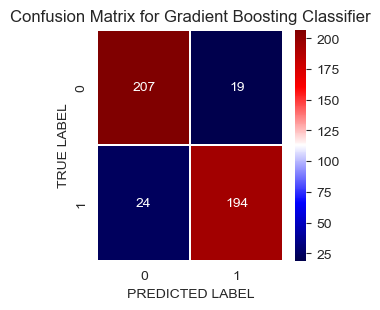

In [130]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="seismic",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Extra Trees Classifier

In [131]:
# Checking accuracy for ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(x_train,y_train)

# Prediction
predxtc = xtc.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.9054054054054054
[[211  15]
 [ 27 191]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       226
           1       0.93      0.88      0.90       218

    accuracy                           0.91       444
   macro avg       0.91      0.90      0.91       444
weighted avg       0.91      0.91      0.91       444



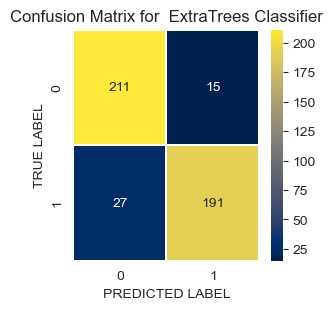

In [132]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predxtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="cividis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

# XGB Classifier

In [133]:
# Checking accuracy for XGBClassifier
xgb = xgb(verbosity=0)
xgb.fit(x_train,y_train)

# Prediction
predxgb = xgb.predict(x_test)

print(accuracy_score(y_test, predxgb))
print(confusion_matrix(y_test, predxgb))
print(classification_report(y_test,predxgb))

0.8963963963963963
[[204  22]
 [ 24 194]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       226
           1       0.90      0.89      0.89       218

    accuracy                           0.90       444
   macro avg       0.90      0.90      0.90       444
weighted avg       0.90      0.90      0.90       444



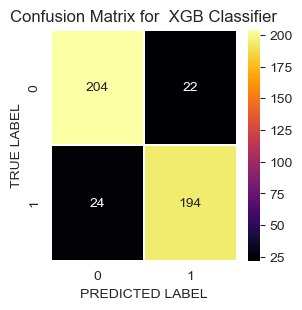

In [134]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predxgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="inferno",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGB Classifier')
plt.show()

# Cross Validation

In [135]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x_resampled,y_resampled,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x_resampled,y_resampled,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,x_resampled,y_resampled,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x_resampled,y_resampled,cv=5).mean())

# cv score for XGB Classifier
print('XGB Classifier:',cross_val_score(xgb,x_resampled,y_resampled,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(xtc,x_resampled,y_resampled,cv=5).mean())

Logistic Regression: 0.7418918918918919
Random Forest Classifier: 0.8797297297297298
AdaBoosting Classifier: 0.8385135135135136
Gradient Boosting Classifier: 0.8804054054054055
XGB Classifier: 0.8925675675675675
Extra Trees Classifier: 0.9141891891891891


# Hyper parameter tuning

In [136]:
# ExtraTrees Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [137]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [138]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [139]:
GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [140]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

In [141]:
Fraud_Reported=ExtraTreesClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
Fraud_Reported.fit(x_train, y_train)
pred = Fraud_Reported.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.66666666666666


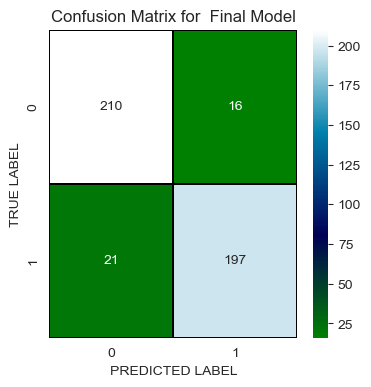

In [142]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Plotting ROC_AUC Curve

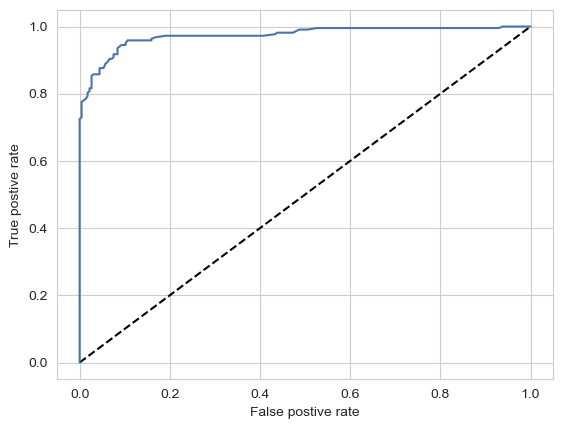

Auc Score :
 0.9164366322968255


In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Fraud_Reported.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='extra Trees Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(y_test, Fraud_Reported.predict(x_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving the Final Model

In [144]:
import joblib
joblib.dump(Fraud_Reported,"Prediction_of_Fraud_Reported.pkl")

['Prediction_of_Fraud_Reported.pkl']

# Predicting the model

In [145]:
# Loading the saved model
model=joblib.load("Prediction_of_Fraud_Reported.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [146]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0            0         0
1            1         1
2            0         0
3            1         1
4            0         1
..         ...       ...
439          0         0
440          1         1
441          1         0
442          0         0
443          1         1

[444 rows x 2 columns]

# ===============THANKS===========================